**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
from tqdm import tqdm
from google.colab import files
%pip install kaleido
import kaleido
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00


In [3]:
pio.renderers.default = "svg"

**Data Loading and Pre-processing**

In [4]:
df = pd.read_csv('/content/data (1).csv')
df.head()

Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor    4.6000   
1           1  Volkswagen                       ID.3 Pure   10.0000   
2           2    Polestar                               2    4.7000   
3           3         BMW                            iX3     6.8000   
4           4       Honda                              e     9.5000   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

In [5]:
df = df.dropna()

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor    4.6000           233   
1  Volkswagen                       ID.3 Pure   10.0000           160   
2    Polestar                               2    4.7000           210   
3         BMW                            iX3     6.8000           180   
4       Honda                              e     9.5000           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161             940            1        AWD   
1       270              167             250            0        RWD   
2       400              181             620            1        AWD   
3       360              206             560            1        RWD   
4       170              168             190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  4615.9360  
1  Type 2 CCS  Hatchback       C      5      30000  2496.0000  
2  Type 2 CCS   Liftback       D      5      56440  4695.8080  
3  Type 2 CCS        SUV       D      5      68040  5660.9280  
4  Type 2 CCS  Hatchback       B      4      32997  2745.3504

**Information of the type of data in seach column**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


**Finding out the number of null values**

In [8]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

**Descriptive Statistics of the dataset**

In [9]:
df.describe()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.0000      103.0000  103.0000         103.0000        103.0000   
mean     7.3961      179.1942  338.7864         189.1650        444.2718   
std      3.0174       43.5730  126.0144          29.5668        203.9493   
min      2.1000      123.0000   95.0000         104.0000        170.0000   
25%      5.1000      150.0000  250.0000         168.0000        260.0000   
50%      7.3000      160.0000  340.0000         180.0000        440.0000   
75%      9.0000      200.0000  400.0000         203.0000        555.0000   
max     22.4000      410.0000  970.0000         273.0000        940.0000   

       RapidCharge    Seats   PriceEuro  inr(10e3)  
count     103.0000 103.0000    103.0000   103.0000  
mean        0.7476   4.8835  55811.5631  4643.5221  
std         0.4365   0.7958  34134.6653  2840.0042  
min         0.0000   2.0000  20129.0000  1674.7328  
25%         0.5000   5.0000  34429.5000  2864.5344  
50%         1.0000   5.0000  45000.0000  3744.0000  
75%         1.0000   5.0000  65000.0000  5408.0000  
max         1.0000   7.0000 215000.0000 17888.0000

**Analysis of Number of EV models produced by each brand**

<ipython-input-10-1d4b3d8a8c8f>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




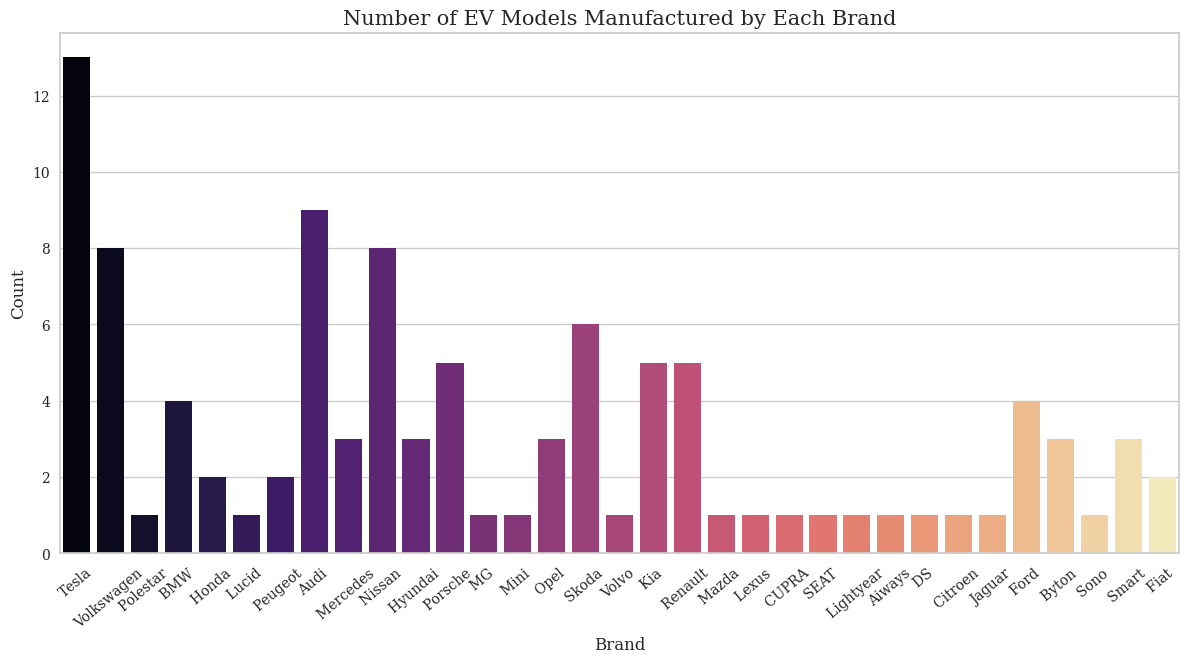

In [10]:
sns.catplot(data=df, x='Brand', kind='count', palette='magma', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by Each Brand', family='serif', size=15)
plt.show()

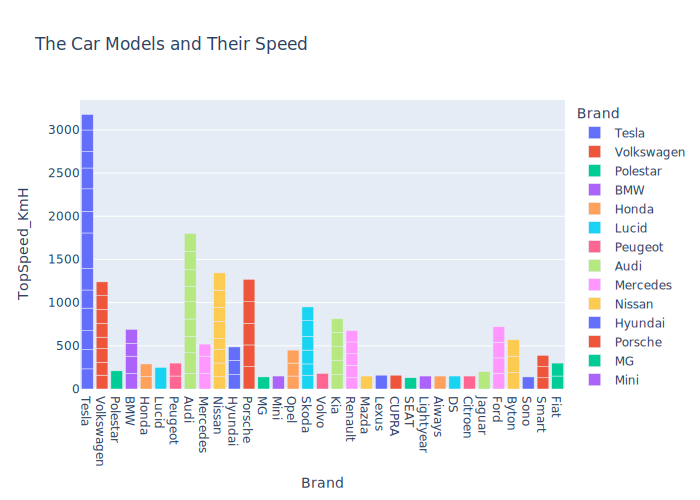

In [11]:
import plotly.io as pio
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'The Car Models and Their Speed',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

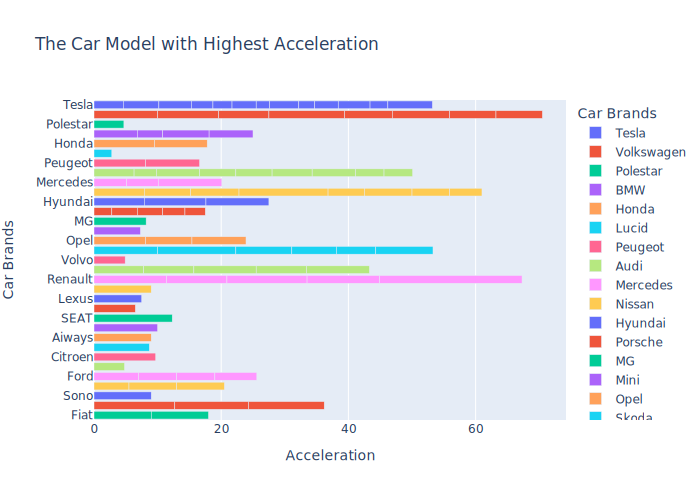

In [12]:
import plotly.express as px
import plotly.io as pio

# Create bar graph using Plotly Express
fig = px.bar(df, x='AccelSec', y='Brand', color='Brand',
             orientation='h',
             title='The Car Model with Highest Acceleration',
             labels={'AccelSec': 'Acceleration', 'Brand': 'Car Brands'})

# Show the plot
pio.show(fig)

Text(0.5, 1.0, 'Price Comparison')

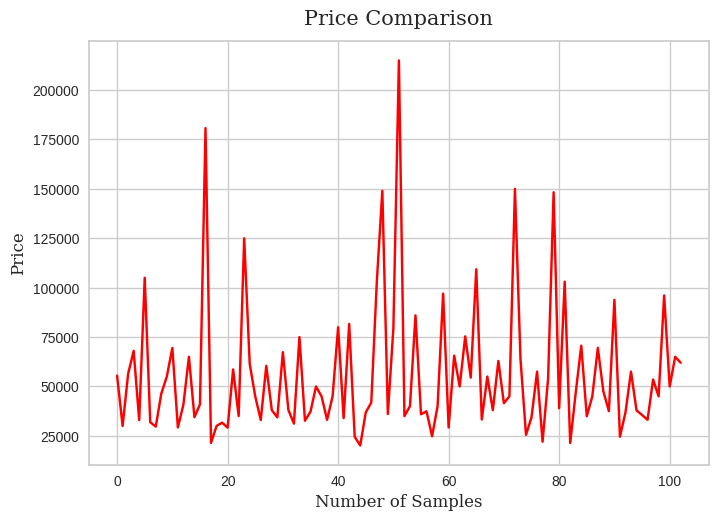

In [13]:
plt.subplot(111)
plt.plot(df['PriceEuro'], color='red')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12)

<ipython-input-14-1909ef0267f4>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-14-1909ef0267f4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Brand-wise Analysis of the Number of Seats')

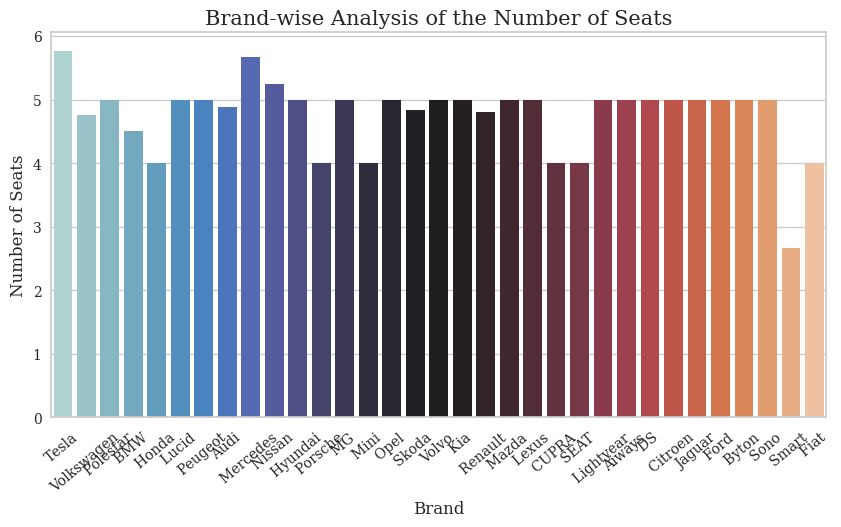

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Brand', y='Seats', data=df, palette='icefire', ci=None, ax=ax)
sns.despine(right=False, top=False, ax=ax)
plt.sca(ax)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(rotation=40, family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15)

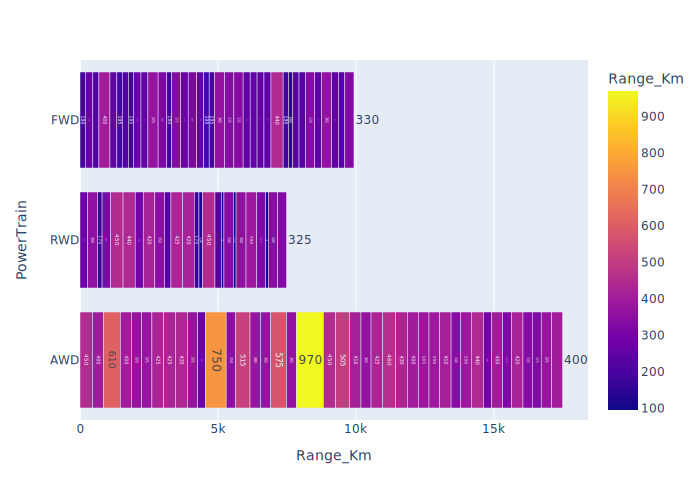

In [15]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'Range_Km',text='Range_Km')
pio.show(fig)

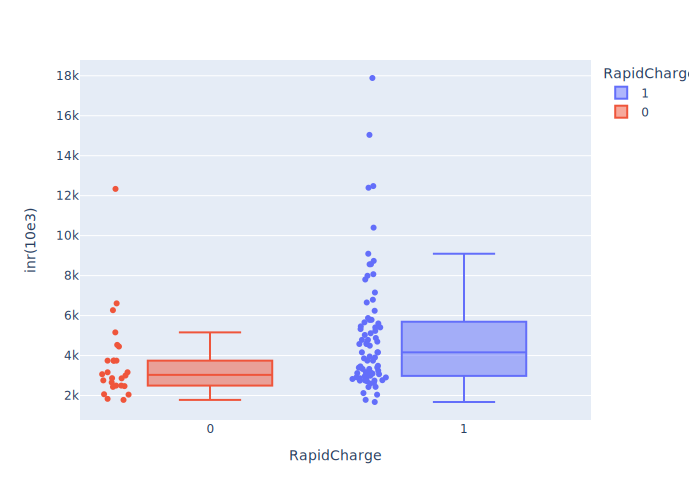

In [16]:
fig = px.box(df, x='RapidCharge', y='inr(10e3)', color='RapidCharge', points='all').show()

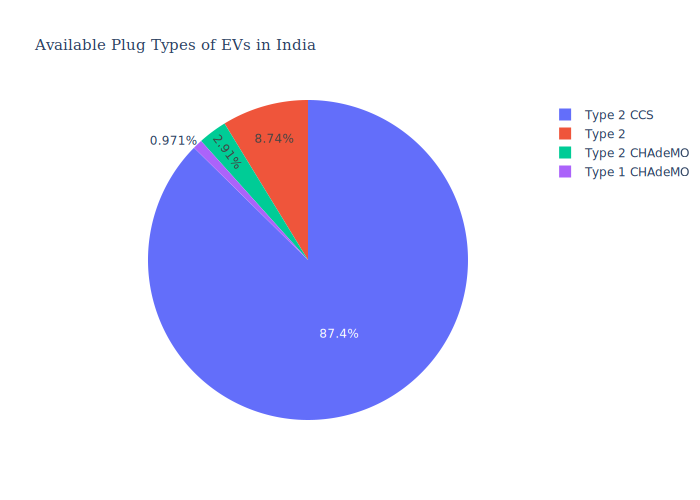

In [17]:
import plotly.express as px

# Get the value counts of 'PlugType'
plugtype_counts = df['PlugType'].value_counts()

# Convert to DataFrame for easier manipulation
plugtype_counts_df = plugtype_counts.reset_index()
plugtype_counts_df.columns = ['Plug Type', 'Count']

# Create pie chart using Plotly Express
fig = px.pie(plugtype_counts_df, names='Plug Type', values='Count',
             title='Available Plug Types of EVs in India')

# Customize labels and title
fig.update_layout(
    title=dict(font=dict(family='serif', size=15))
)

**Pairplot of all the columns based on Rapid Charger presence**

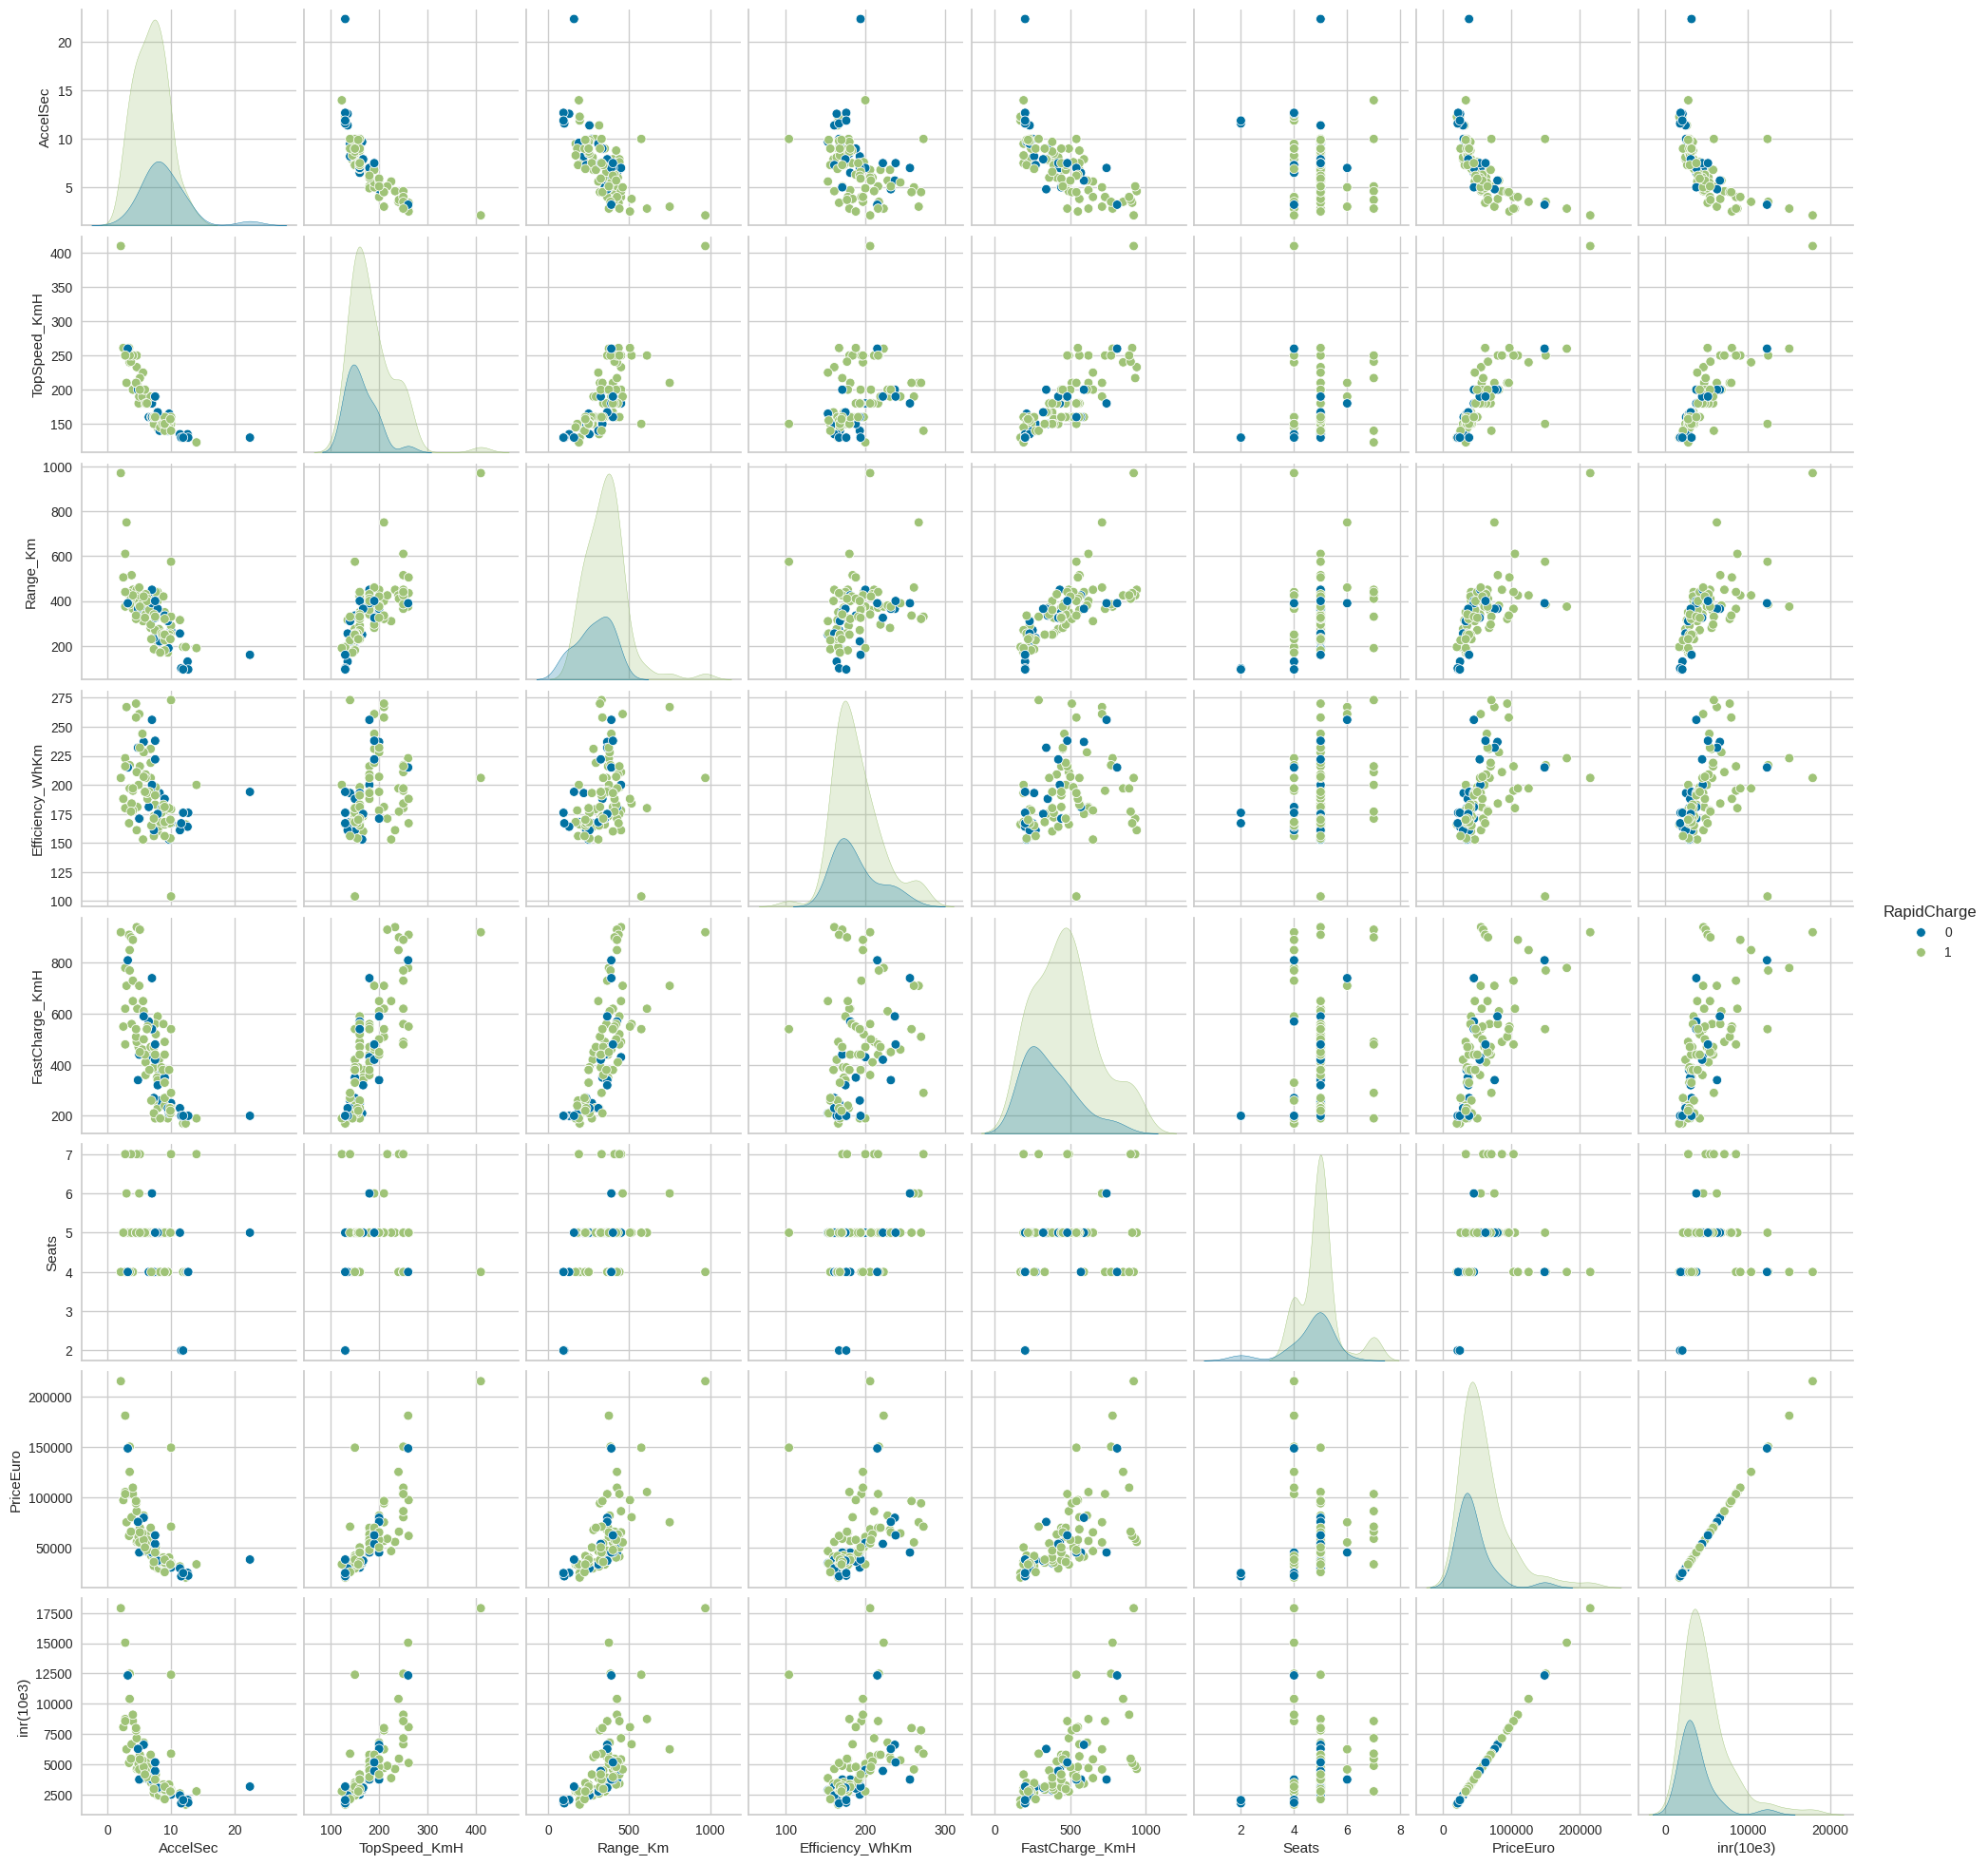

In [18]:
sns.pairplot(df,hue='RapidCharge')

**Plotting an area chart**

<ipython-input-20-26b70198c194>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



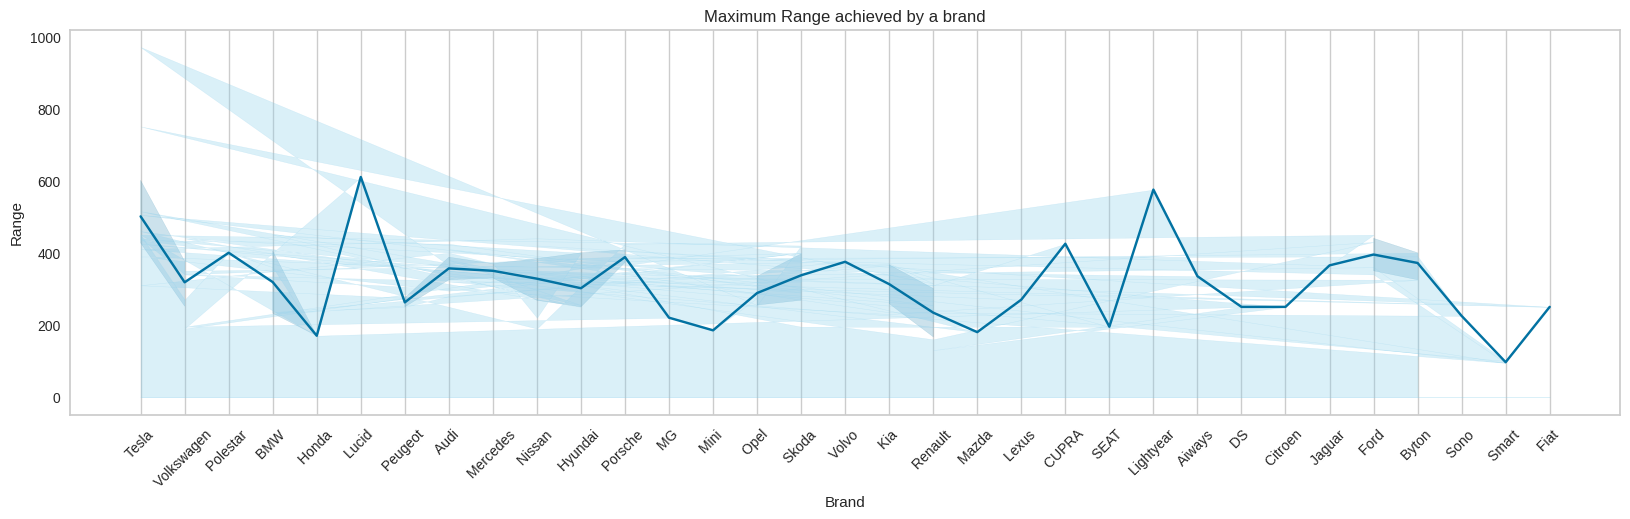

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.lineplot(x='Brand', y='Range_Km', data=df, palette='tab10', sort=False)
plt.fill_between(df['Brand'], df['Range_Km'], color='skyblue', alpha=0.3)
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()


**Linear Regression**

**Independent variable x and dependent variable y**

In [21]:
replace_dict = {'RWD': 0, 'AWD': 2, 'FWD': 1}
df['PowerTrain'] = df['PowerTrain'].replace(replace_dict)

x = df[['AccelSec', 'Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm', 'RapidCharge', 'PowerTrain']]
y = df['PriceEuro']

**Linear regression using OLS method**

In [22]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

**Fitting the model and summarizing**

In [23]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.57e-24
Time:                        19:55:45   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     -4.324      0.000    -1.5e+05   -5.58e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain       5235.8309   2956.235      1.771      0.080    -632.248    1.11e+04
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [25]:
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(LinearRegression())
lr_pipe.fit(X_train, y_train)
pred = lr_pipe.predict(X_test)

**Finding out the R-squared value**

In [26]:
r2 = r2_score(y_test, pred)
print(f'{r2 * 100:.2f}')

78.77


Around 78% of the dependant variable has been explained by the independant variables

In [27]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [29]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Confusion Matrix of the regression**

In [30]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]])

**Clustering**

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

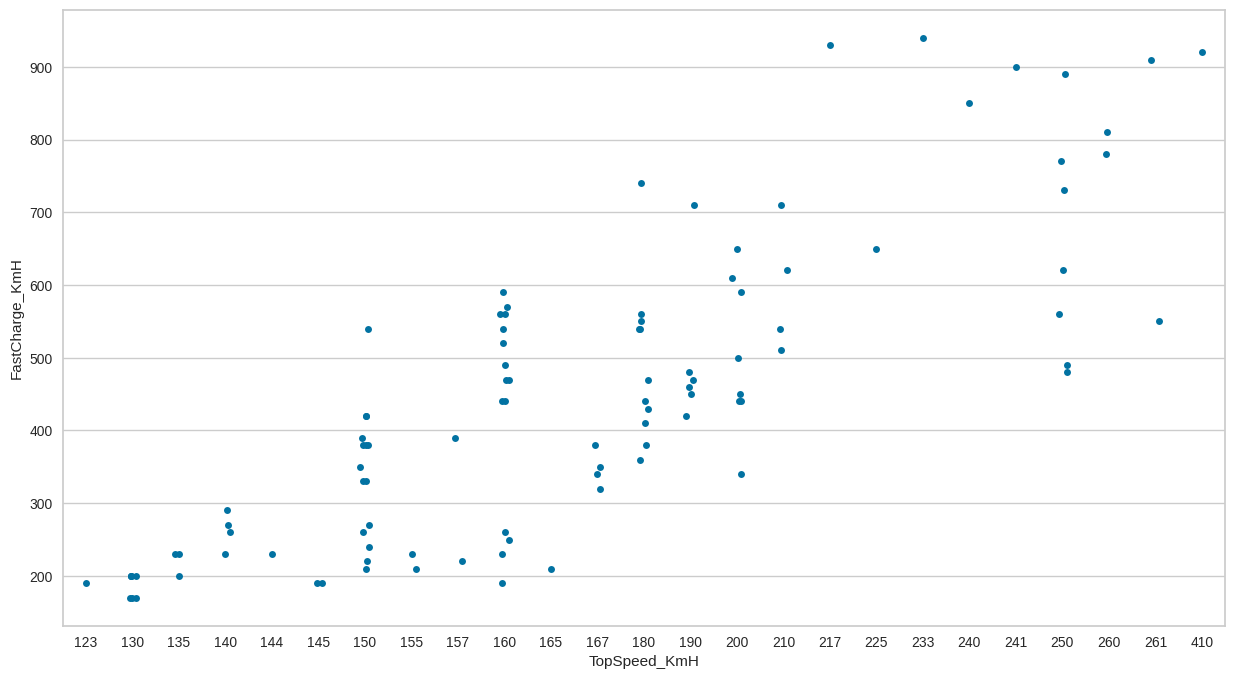

In [31]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

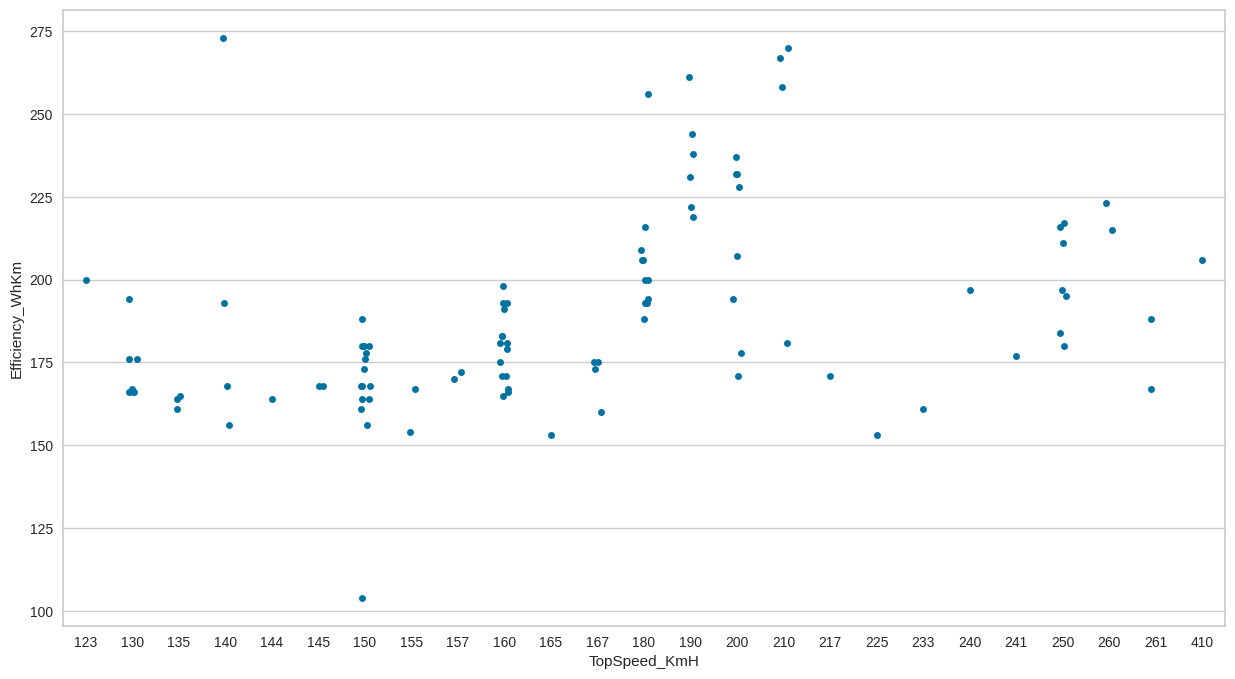

In [32]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [33]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [34]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

PC1     PC2     PC3     PC4     Pc5     PC6     PC7     PC8     PC9
0    2.4292 -0.5546 -1.1478 -0.8828  0.8400 -0.9593  0.9989  0.7111 -0.3967
1   -2.3225 -0.3454  0.8965 -1.3055  0.0796  0.2351 -0.2137 -0.5441 -0.1819
2    1.5879  0.0089 -0.6505  0.0410  0.5935 -0.6982  0.0587  0.2488 -0.2028
3    0.2910 -0.0001 -0.3077 -0.5142 -1.6089  0.2916  0.3650 -0.2355  0.2617
4   -2.6027 -0.6265 -0.8881  0.5853 -0.8021  0.0274 -0.0850 -0.5078 -0.0499
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
98  -0.2972  0.4467 -0.4636  0.1025 -0.3460 -0.1005  0.0311  0.2023  0.1454
99   2.3350  0.6307  0.9859  1.5601 -0.8173 -0.1219  0.1641 -0.2557  0.1410
100  0.7806  0.4268 -0.2986  0.7086  0.4817 -0.5401 -0.1398 -0.0487 -0.3675
101  1.5409  0.6988  0.4224  1.0949 -0.2981 -0.3080 -0.3632  0.1273 -0.1904
102  0.9151  0.2615  2.4106  0.1880  0.3408  0.0156 -0.1719  0.5676 -0.2008

[103 rows x 9 columns]

In [35]:
df_9=data2.iloc[:,:9]
df_9.head(3)

PC1     PC2     PC3     PC4    Pc5     PC6     PC7     PC8     PC9
0  2.4292 -0.5546 -1.1478 -0.8828 0.8400 -0.9593  0.9989  0.7111 -0.3967
1 -2.3225 -0.3454  0.8965 -1.3055 0.0796  0.2351 -0.2137 -0.5441 -0.1819
2  1.5879  0.0089 -0.6505  0.0410 0.5935 -0.6982  0.0587  0.2488 -0.2028

In [36]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in range(1, num_pc+1)]
variables = df_9.columns.values

loadings_df = pd.DataFrame(loadings.T, columns=pc_list, index=variables)
loadings_df


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9
PC1 -0.3964  0.0862  0.0648  0.0583  0.1445  0.6769  0.4125  0.2707 -0.3246
PC2  0.4220 -0.2168  0.0023 -0.0685  0.0382  0.0452  0.0376 -0.4138 -0.7708
PC3  0.2383  0.3309  0.5718  0.3805 -0.5751  0.0249  0.0047  0.1442 -0.0990
PC4  0.3945 -0.1384 -0.0477 -0.2965 -0.0924 -0.2379  0.7282  0.3584  0.1057
Pc5  0.1572  0.2699 -0.8033  0.3953 -0.2926  0.0870  0.0539  0.0408 -0.0561
PC6  0.3895 -0.0247 -0.0763 -0.3871 -0.0328  0.3645 -0.5208  0.5342 -0.0380
PC7  0.1404  0.8013  0.0195 -0.4290  0.1653  0.0867  0.0984 -0.3208  0.0800
PC8  0.3898 -0.2623  0.0738  0.1799  0.0433  0.5587  0.1180 -0.3821  0.5172
PC9  0.3229  0.1805  0.0983  0.4866  0.7228 -0.1499 -0.0191  0.2653 -0.0333

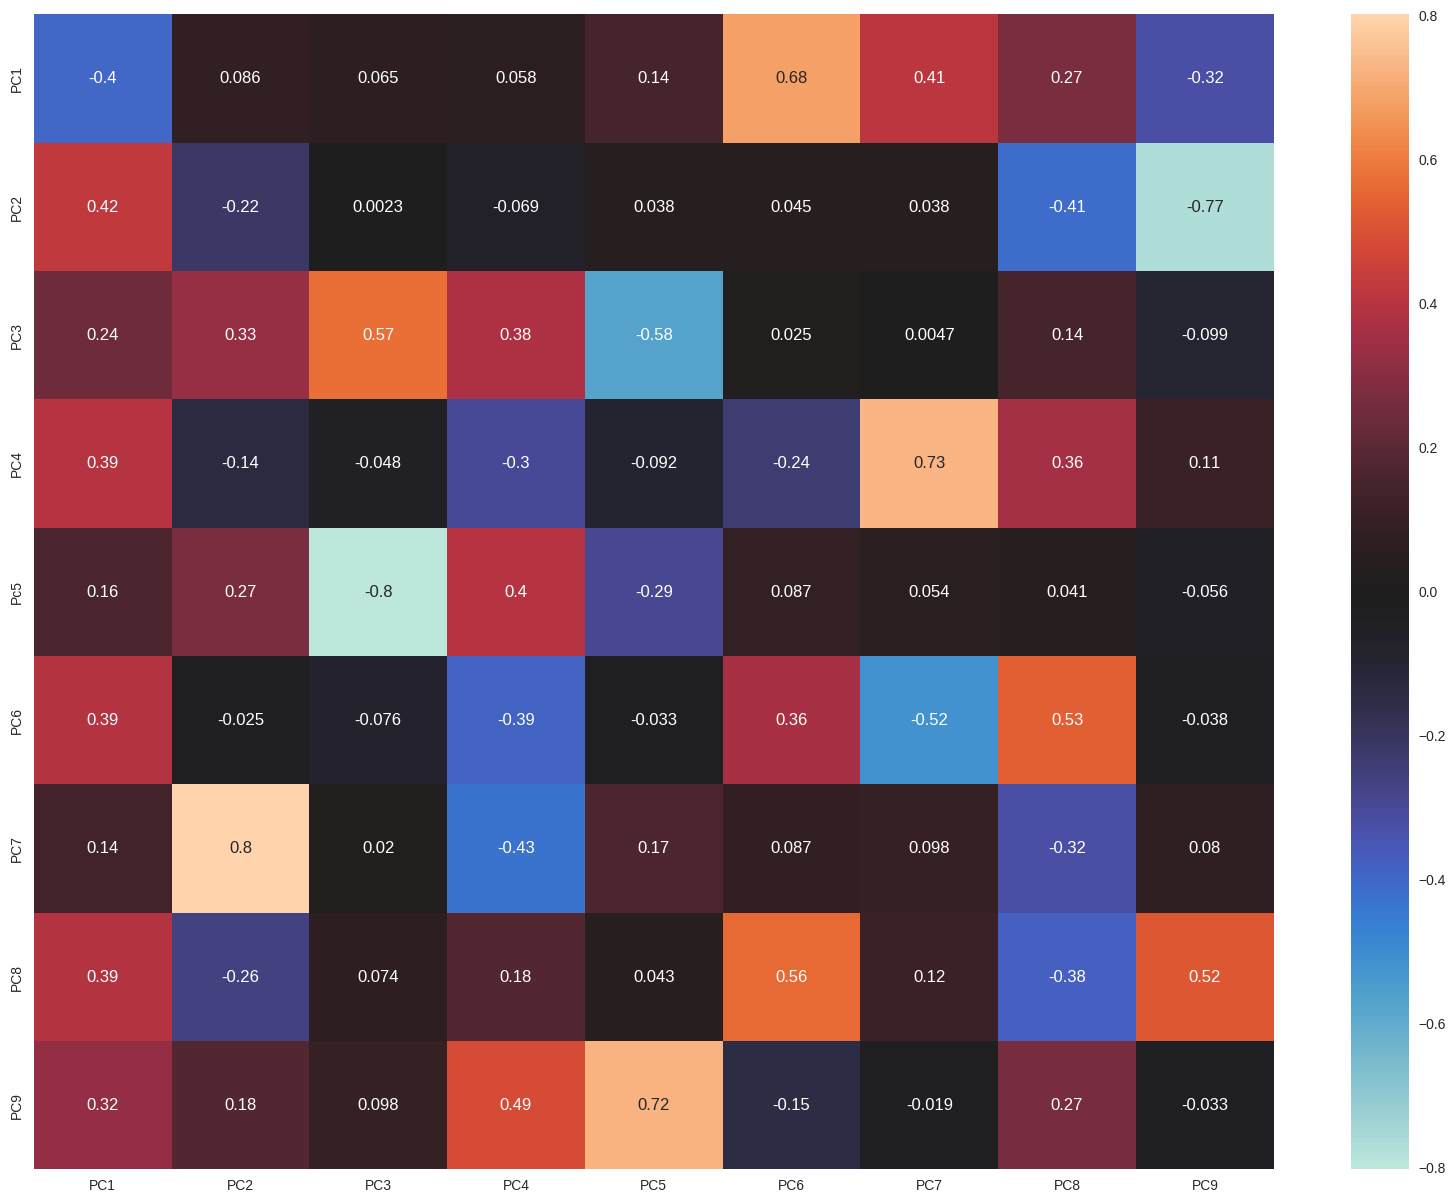

In [38]:
plt.figure(figsize=(20, 15))
ax = sns.heatmap(loadings_df, annot=True, cmap='icefire')
plt.show()


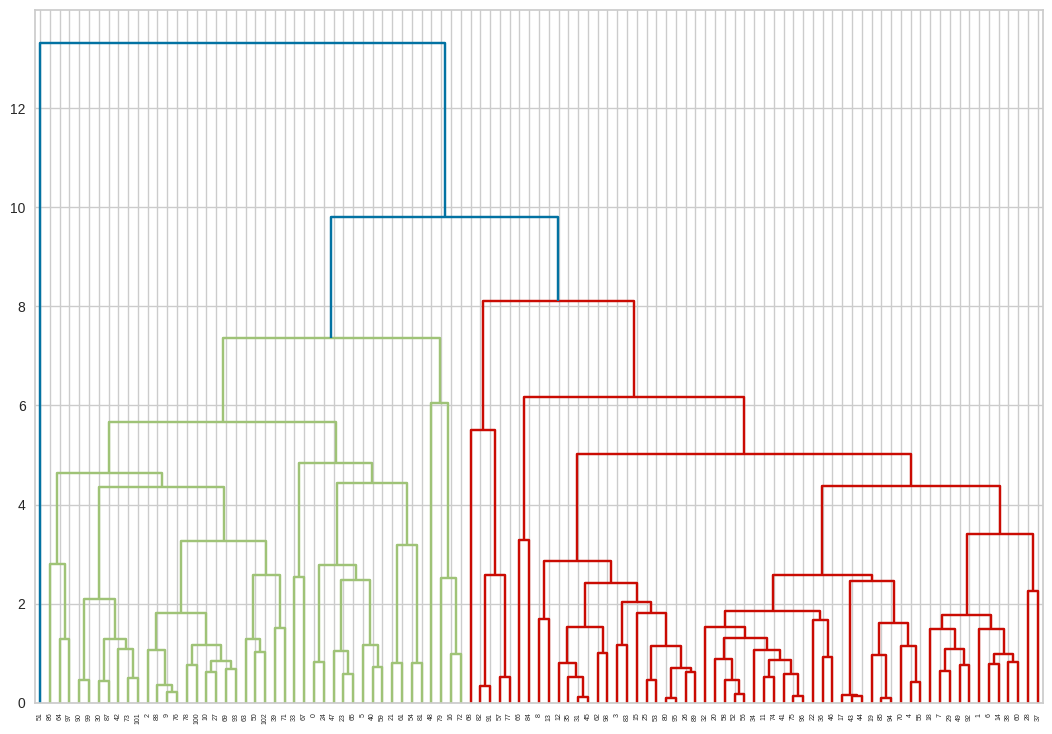

In [39]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()


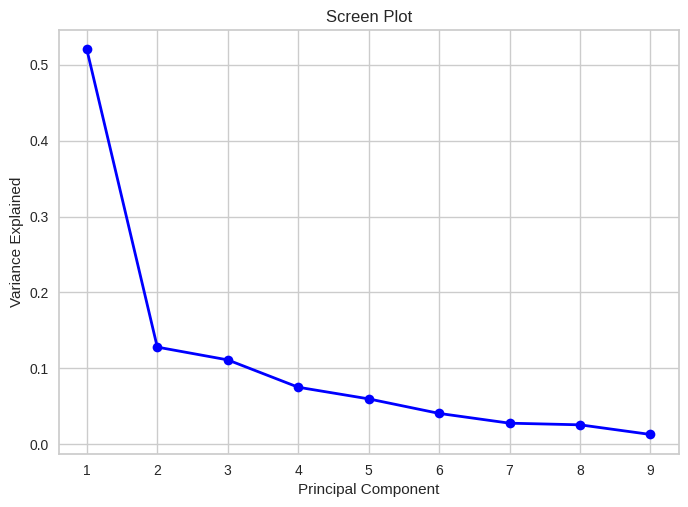

In [40]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

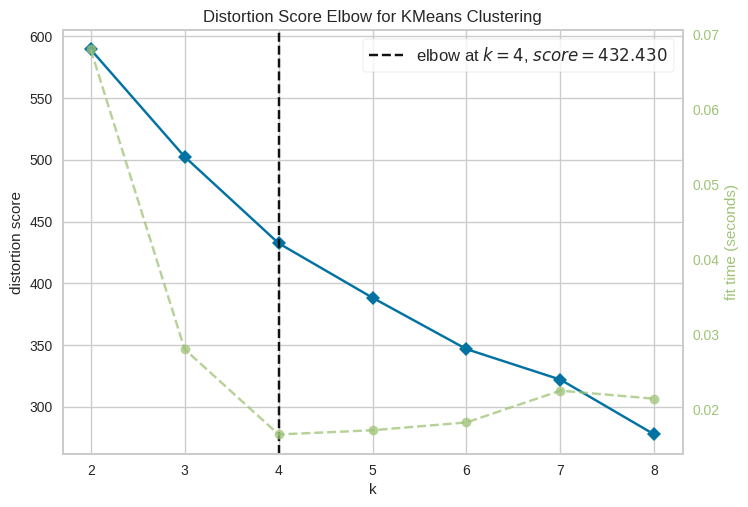

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

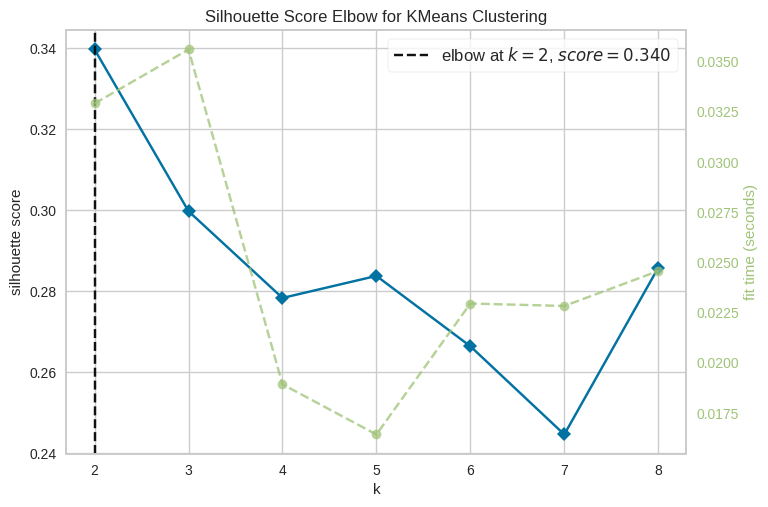

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

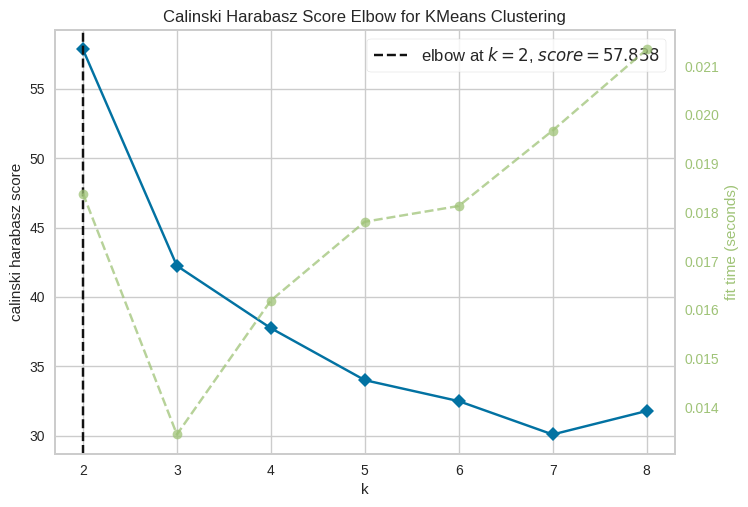

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [43]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()

In [44]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.


[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.887468451736
5
[[ 3.38081 -1.38223 -0.36489  0.10477  0.40601  0.27185  0.242   -0.10662
   0.04313]
 [-1.28035  0.15751 -0.8038   0.03883 -0.26171  0.05765 -0.02518 -0.04843
  -0.00967]
 [ 1.4734   0.75533  0.44439  0.22305  0.00588 -0.20901 -0.0464   0.13708
   0.00747]
 [-2.16662 -0.64972  1.15112 -0.52704  0.2495   0.04766 -0.03575 -0.0585
  -0.02224]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [45]:
Counter(kmeans.labels_)


Counter({0: 13, 3: 19, 2: 32, 1: 39})

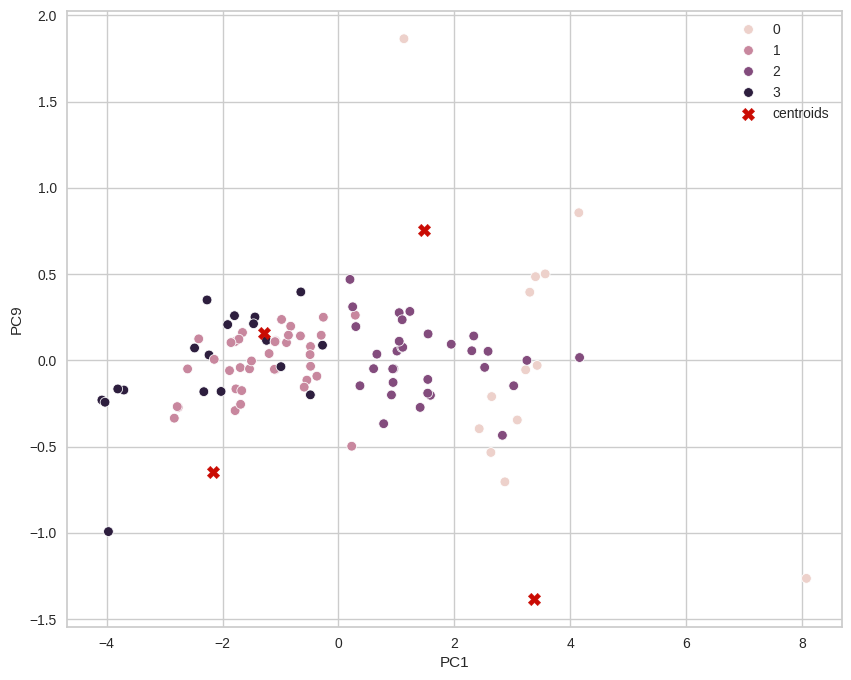

In [46]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


In [47]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
l=LinearRegression().fit(X_train,y_train)

In [50]:
print(l.intercept_)


4643.522050485438


In [51]:
l.coef_


array([ 1101.58721,  -741.20904,   208.53617,   508.32246,   122.3533 ,
        1579.00686,   333.61147, -1079.99512,  1461.72269])

In [53]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [56]:
cd=pd.DataFrame(l.coef_, X.columns, columns=['Coeff'])
cd

Coeff
PC1  1101.5872
PC2  -741.2090
PC3   208.5362
PC4   508.3225
Pc5   122.3533
PC6  1579.0069
PC7   333.6115
PC8 -1079.9951
PC9  1461.7227

In [57]:
predictions=l.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [58]:
y_test

37    3744.0000
1     2496.0000
69    5233.2800
80    3243.7184
92    3064.8384
61    5459.5840
85    2903.6800
53    3328.0000
88    3952.0000
32    2594.5088
6     2654.0800
71    3744.0000
43    2041.2288
16   15040.9792
50    6609.8240
31    3170.3360
97    4451.2000
14    2866.9888
25    3744.0000
51   17888.0000
21    4877.1840
3     5660.9280
84    5876.4992
57    2062.5280
48   12396.8000
47    8565.0240
79   12338.6432
58    3328.0000
2     4695.8080
13    5408.0000
45    3064.8384
89    3120.0000
41    2826.3872
23   10400.0000
26    2745.6000
22    2912.0000
94    3153.2800
27    5028.3584
20    2424.9472
66    2766.0672
30    5604.1856
35    3098.1184
Name: inr(10e3), dtype: float64

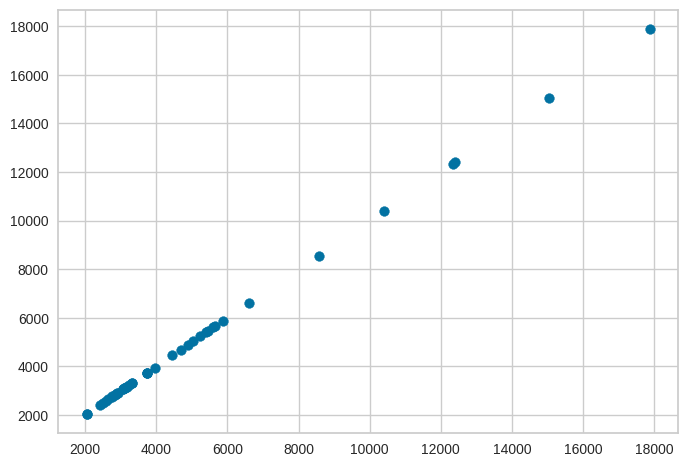

In [59]:
plt.scatter(y_test, predictions)


<ipython-input-60-550730dc5ec8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='inr(10e3)', ylabel='Density'>

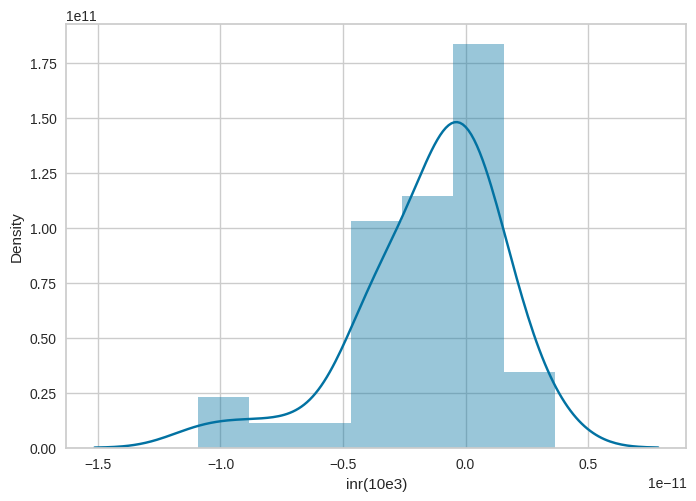

In [60]:
sns.distplot((y_test-predictions))

In [61]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.2629094365540715e-12
MSE: 1.0768119045556378e-23
RMSE: 3.281481227366138e-12


In [62]:
metrics.mean_absolute_error(y_test,predictions)

2.2629094365540715e-12

In [63]:
metrics.mean_squared_error(y_test,predictions)


1.0768119045556378e-23

In [64]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.281481227366138e-12

**Statewise Charging Station Sanctioned**

In [65]:
StateChargingStation = pd.read_csv("/content/Statewise Charging Stations Sanctioned.csv")

In [66]:
StateChargingStation.head()

State  Sanctioned State Wise Charging Stations
0  Andhra Pradesh                                      266
1           Assam                                       20
2           Bihar                                       37
3      Chandigarh                                       70
4     Chattisgarh                                       25

In [67]:
StateChargingStation.tail()

State  Sanctioned State Wise Charging Stations
21      Uttar Pradesh                                      207
22        Uttarakhand                                       10
23       West Bengal                                       141
24  Andaman & Nicobar                                       10
25              Total                                     2877

In [68]:
StateChargingStation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State                                    26 non-null     object
 1   Sanctioned State Wise Charging Stations  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [69]:
StateChargingStation.columns.tolist()

['State', 'Sanctioned State Wise Charging Stations']

In [70]:
StateChargingStation.shape

(26, 2)

In [71]:
print(pd.isnull(StateChargingStation).sum())

State                                      0
Sanctioned State Wise Charging Stations    0
dtype: int64


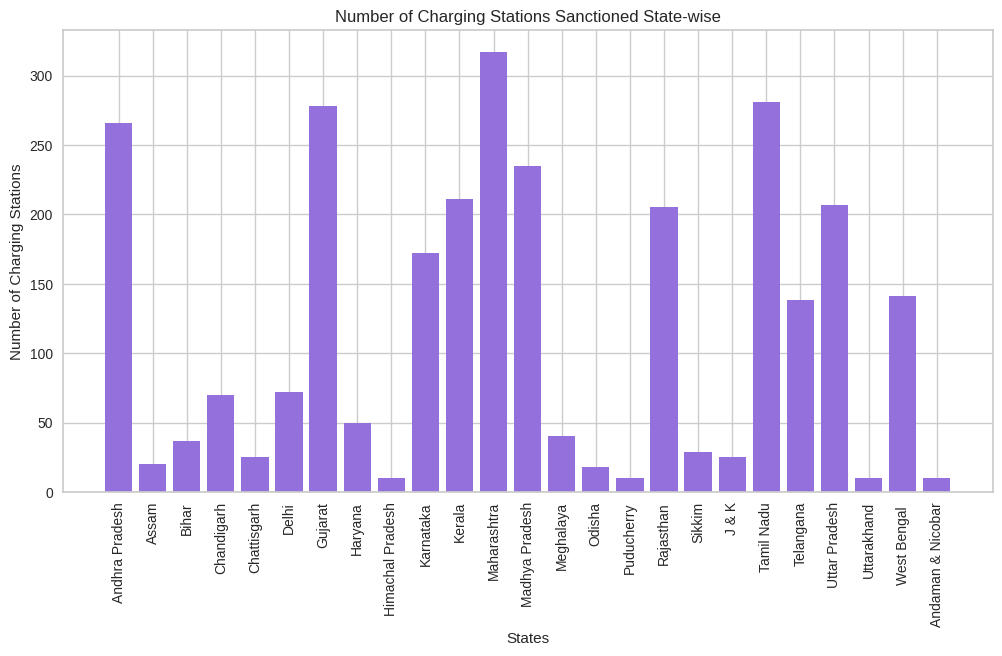

In [72]:
StateChargingStation =StateChargingStation[StateChargingStation['State'] != 'Total']

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(StateChargingStation['State'], StateChargingStation['Sanctioned State Wise Charging Stations'], color='mediumpurple')
plt.xlabel('States')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations Sanctioned State-wise')
plt.xticks(rotation=90)
plt.show()


Maharashtra, Uttar Pradesh, and Gujarat have the highest number of sanctioned charging stations, with over 200 stations each.

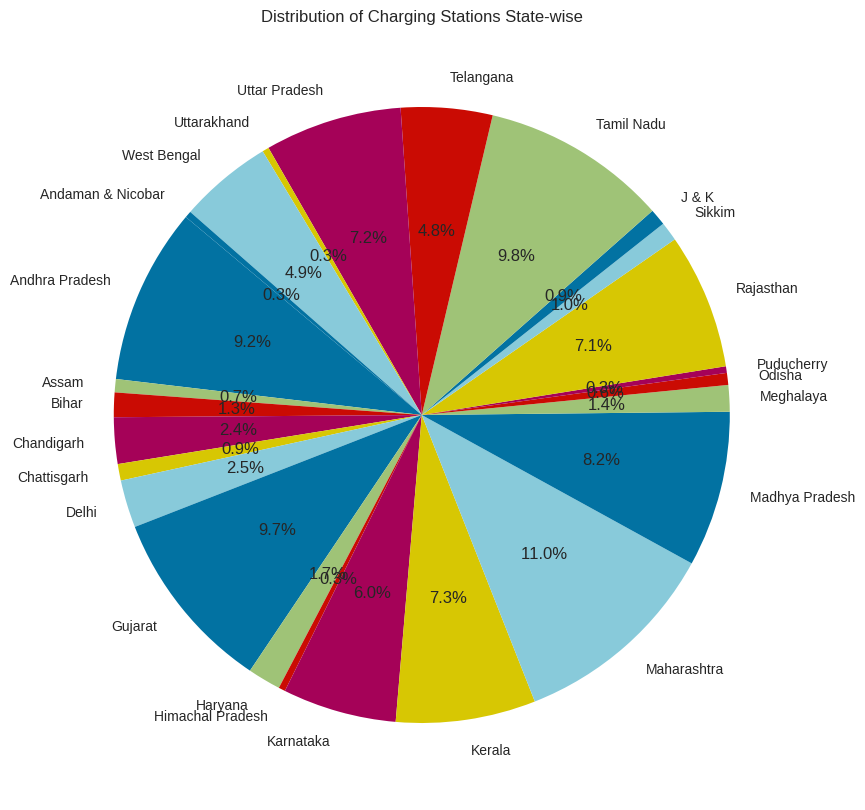

Total Charging Stations: 2877


In [73]:
plt.figure(figsize=(10, 10))
plt.pie(StateChargingStation['Sanctioned State Wise Charging Stations'], labels=StateChargingStation['State'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charging Stations State-wise')
plt.show()

# Display total number of charging stations
totalChargingStations = sum(StateChargingStation['Sanctioned State Wise Charging Stations'])
print(f'Total Charging Stations: {totalChargingStations}')

The distribution of charging stations is uneven across states, with a few states having a large number of stations and many states having no stations at all. This could lead to challenges for electric vehicle adoption in some parts of the country.

**Fuel Type wise vehicle registration in India**

**Loading the Fuel Type wise vehicle registration dataset**

In [74]:
FuelType = pd.read_csv("/content/Fuel type Registration of Vehicles.csv")

In [75]:
FuelType.head()

Month  CNG ONLY  DIESEL  DIESEL/HYBRID  DUAL DIESEL/CNG  ELECTRIC(BOV)  \
0  Jan-14      2103  270915              3                0            232   
1  Feb-14      1607  219601              3                1            171   
2  Mar-14      2026  258723              3                1            220   
3  Apr-14      1718  222632              3                1            252   
4  May-14      1727  237336              6                0            186   

   ETHANOL  LPG ONLY  NOT APPLICABLE   PETROL  PETROL/CNG  PETROL/ETHANOL  \
0        0       188           10278  1347016       20623               0   
1        1       116            8884  1176669       15266               0   
2        1       106           11115  1329273       18800               0   
3        0       121            8522  1296500       19714               1   
4        2       103            9656  1408836       20626               0   

   PETROL/HYBRID  PETROL/LPG  SOLAR  FUEL CELL HYDROGEN  LNG  METHANOL  \
0              0        6307      9                   0    0         0   
1              1        4803     17                   0    0         0   
2              0        5609     16                   0    0         0   
3              0        5600     19                   0    0         0   
4              1        6317     14                   0    0         0   

   DUAL DIESEL/LNG  
0                0  
1                0  
2                0  
3                0  
4                0

**Exploring the Dataset**

In [76]:
FuelType.columns.tolist()

['Month',
 'CNG ONLY',
 'DIESEL',
 'DIESEL/HYBRID',
 'DUAL DIESEL/CNG',
 'ELECTRIC(BOV)',
 'ETHANOL',
 'LPG ONLY',
 'NOT APPLICABLE',
 'PETROL',
 'PETROL/CNG',
 'PETROL/ETHANOL',
 'PETROL/HYBRID',
 'PETROL/LPG',
 'SOLAR',
 'FUEL CELL HYDROGEN',
 'LNG',
 'METHANOL',
 'DUAL DIESEL/LNG']

In [77]:
print(pd.isnull(FuelType).sum())

Month                 0
CNG ONLY              0
DIESEL                0
DIESEL/HYBRID         0
DUAL DIESEL/CNG       0
ELECTRIC(BOV)         0
ETHANOL               0
LPG ONLY              0
NOT APPLICABLE        0
PETROL                0
PETROL/CNG            0
PETROL/ETHANOL        0
PETROL/HYBRID         0
PETROL/LPG            0
SOLAR                 0
FUEL CELL HYDROGEN    0
LNG                   0
METHANOL              0
DUAL DIESEL/LNG       0
dtype: int64


In [78]:
FuelType.shape

(115, 19)

In [79]:
FuelType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [80]:
FuelType.describe()

CNG ONLY      DIESEL  DIESEL/HYBRID  DUAL DIESEL/CNG  ELECTRIC(BOV)  \
count   115.0000    115.0000       115.0000         115.0000       115.0000   
mean   7857.3391 219305.1739      1346.8783           0.4087     24040.4522   
std    9981.9283  46638.6958      1927.2841           0.8573     35980.3526   
min     189.0000  18622.0000         0.0000           0.0000       148.0000   
25%    2171.0000 202185.0000         4.0000           0.0000      3522.5000   
50%    2669.0000 223470.0000       135.0000           0.0000      9115.0000   
75%    7004.0000 244496.0000      2118.0000           1.0000     17027.0000   
max   35272.0000 315950.0000      7462.0000           5.0000    158336.0000   

       ETHANOL  LPG ONLY  NOT APPLICABLE       PETROL  PETROL/CNG  \
count 115.0000  115.0000        115.0000     115.0000    115.0000   
mean    0.5565  624.0957       7991.4609 1484687.8000  27468.7043   
std     1.4277  553.3565       2532.1956  300121.0097   8668.6826   
min     0.0000   53.0000        411.0000  217446.0000   1292.0000   
25%     0.0000  197.0000       6085.5000 1321190.0000  21341.5000   
50%     0.0000  363.0000       8449.0000 1457396.0000  27573.0000   
75%     1.0000 1001.5000       9756.5000 1660804.5000  33896.5000   
max    11.0000 2282.0000      13907.0000 2213734.0000  43443.0000   

       PETROL/ETHANOL  PETROL/HYBRID  PETROL/LPG    SOLAR  FUEL CELL HYDROGEN  \
count        115.0000       115.0000    115.0000 115.0000            115.0000   
mean        1090.6261      5984.8000   5414.6435   7.2174              0.0087   
std         5414.9332      8441.2205   3499.6820   8.9097              0.0933   
min            0.0000         0.0000     57.0000   0.0000              0.0000   
25%            0.0000        29.0000   1156.0000   0.0000              0.0000   
50%            0.0000      1646.0000   6252.0000   3.0000              0.0000   
75%            0.0000      9140.5000   8212.5000  14.0000              0.0000   
max        36230.0000     38119.0000  11547.0000  39.0000              1.0000   

           LNG  METHANOL  DUAL DIESEL/LNG  
count 115.0000  115.0000         115.0000  
mean    1.0870    0.0522           0.0087  
std     3.7710    0.2234           0.0933  
min     0.0000    0.0000           0.0000  
25%     0.0000    0.0000           0.0000  
50%     0.0000    0.0000           0.0000  
75%     0.0000    0.0000           0.0000  
max    23.0000    1.0000           1.0000

In [81]:
FuelType["Month"]=pd.to_datetime(FuelType["Month"], format='%b-%y')
FuelType["Month"].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Month, dtype: datetime64[ns]

In [82]:
petrol_hybrid = FuelType.pop('PETROL/HYBRID')
diesel_hybrid = FuelType.pop('DIESEL/HYBRID')
FuelType['HYBRID_COMBINED'] = petrol_hybrid + diesel_hybrid


In [83]:
FuelType

Month  CNG ONLY  DIESEL  DUAL DIESEL/CNG  ELECTRIC(BOV)  ETHANOL  \
0   2014-01-01      2103  270915                0            232        0   
1   2014-02-01      1607  219601                1            171        1   
2   2014-03-01      2026  258723                1            220        1   
3   2014-04-01      1718  222632                1            252        0   
4   2014-05-01      1727  237336                0            186        2   
..         ...       ...     ...              ...            ...      ...   
110 2023-03-01     34392  239185                0         140895        0   
111 2023-04-01     29921  197337                0         111327        0   
112 2023-05-01     30945  207305                0         158336        0   
113 2023-06-01     34552  225327                0         102409        0   
114 2023-07-01     35272  213472                0         116172        0   

     LPG ONLY  NOT APPLICABLE   PETROL  PETROL/CNG  PETROL/ETHANOL  \
0         188           10278  1347016       20623               0   
1         116            8884  1176669       15266               0   
2         106           11115  1329273       18800               0   
3         121            8522  1296500       19714               1   
4         103            9656  1408836       20626               0   
..        ...             ...      ...         ...             ...   
110      1699            4847  1562953       32745           12776   
111      1545            4336  1323102       31801           18139   
112      1998            4280  1548095       37213           25678   
113      2167            4860  1410875       41391           31854   
114      2282            4350  1307183       42774           36230   

     PETROL/LPG  SOLAR  FUEL CELL HYDROGEN  LNG  METHANOL  DUAL DIESEL/LNG  \
0          6307      9                   0    0         0                0   
1          4803     17                   0    0         0                0   
2          5609     16                   0    0         0                0   
3          5600     19                   0    0         0                0   
4          6317     14                   0    0         0                0   
..          ...    ...                 ...  ...       ...              ...   
110         658      0                   0   23         0                0   
111         347      0                   0   11         0                0   
112         208      0                   0   22         0                0   
113         121      0                   0   13         0                0   
114          57      0                   0    7         0                0   

     HYBRID_COMBINED  
0                  3  
1                  4  
2                  3  
3                  3  
4                  7  
..               ...  
110            38240  
111            28058  
112            26299  
113            26529  
114            23000  

[115 rows x 18 columns]

<ipython-input-84-0db09e095500>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




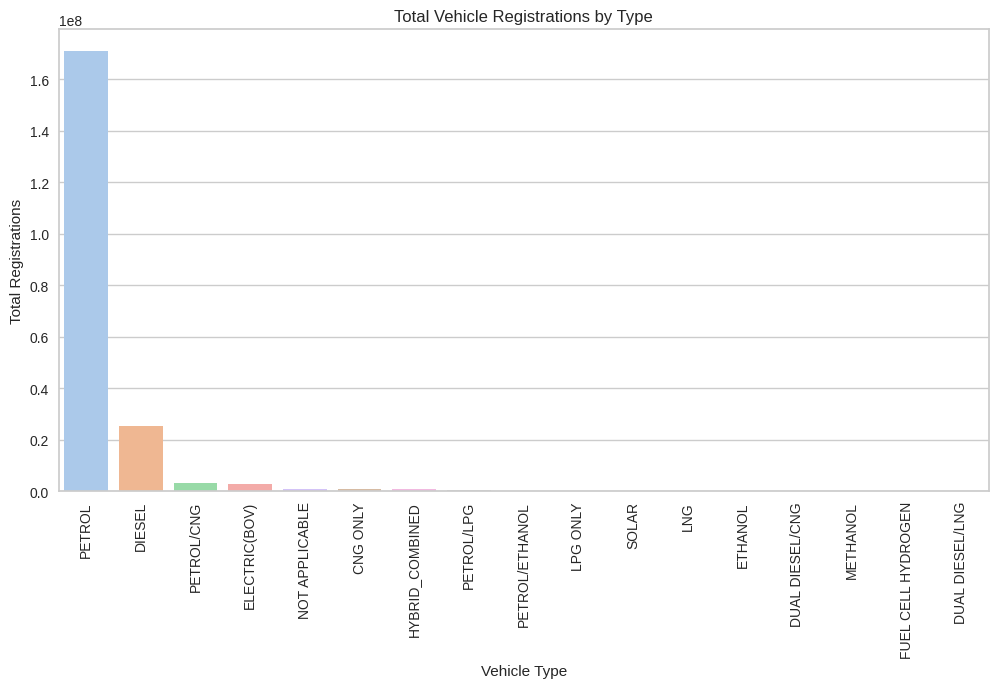

In [84]:
columnsInterest = FuelType.columns

# Create a subset of the DataFrame with the specified columns
selectedColumns = FuelType[columnsInterest]
selectedColumns = selectedColumns.drop('Month', axis=1, errors='ignore')
totalRegistration = selectedColumns.sum()

# Sorting the columns based on total registration in descending order
sortedColumns = totalRegistration.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sortedColumns.index, y=sortedColumns.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Registrations')
plt.title('Total Vehicle Registrations by Type')
plt.show()



*   The Indian vehicle market is still heavily reliant on traditional petrol and diesel fuels.
*   Electric vehicles are witnessing significant growth, but widespread adoption requires overcoming challenges like infrastructure limitations and affordability.



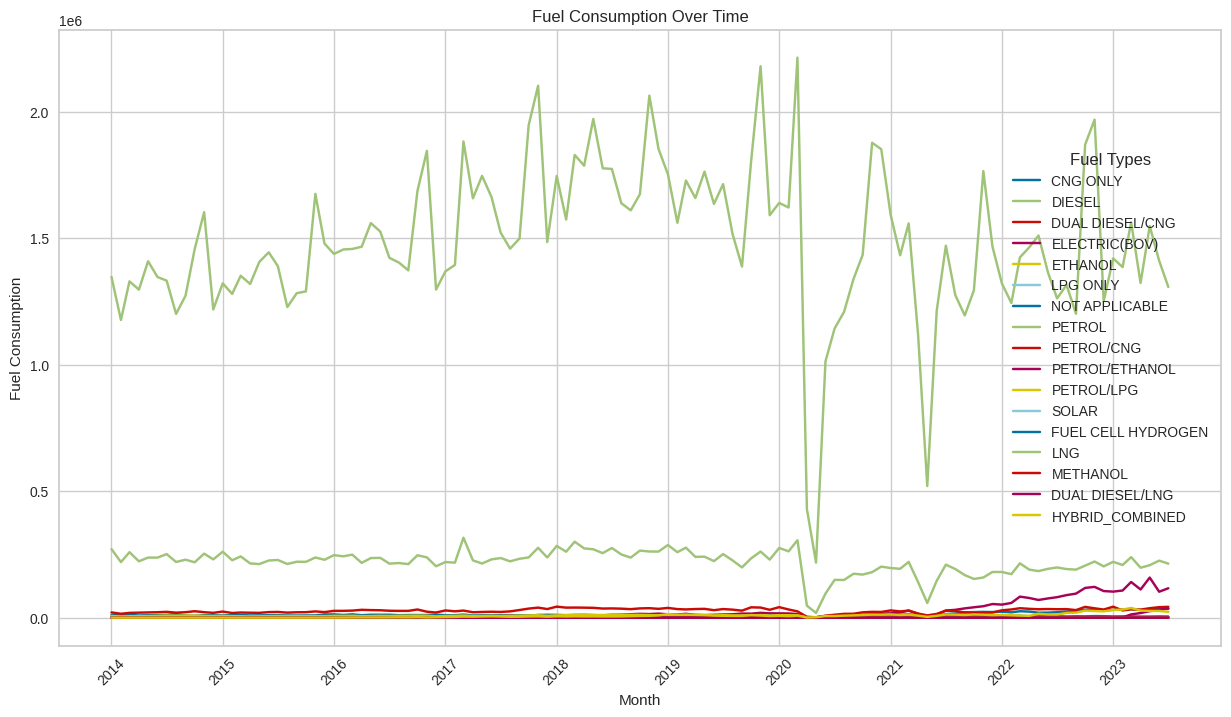

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Loop through each column (fuel type) except for 'Month'
for column in FuelType.columns[1:]:
    plt.plot(FuelType["Month"], FuelType[column], label=column)

plt.legend(title="Fuel Types", loc="best")
plt.title("Fuel Consumption Over Time")
plt.xlabel("Month")
plt.ylabel("Fuel Consumption")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


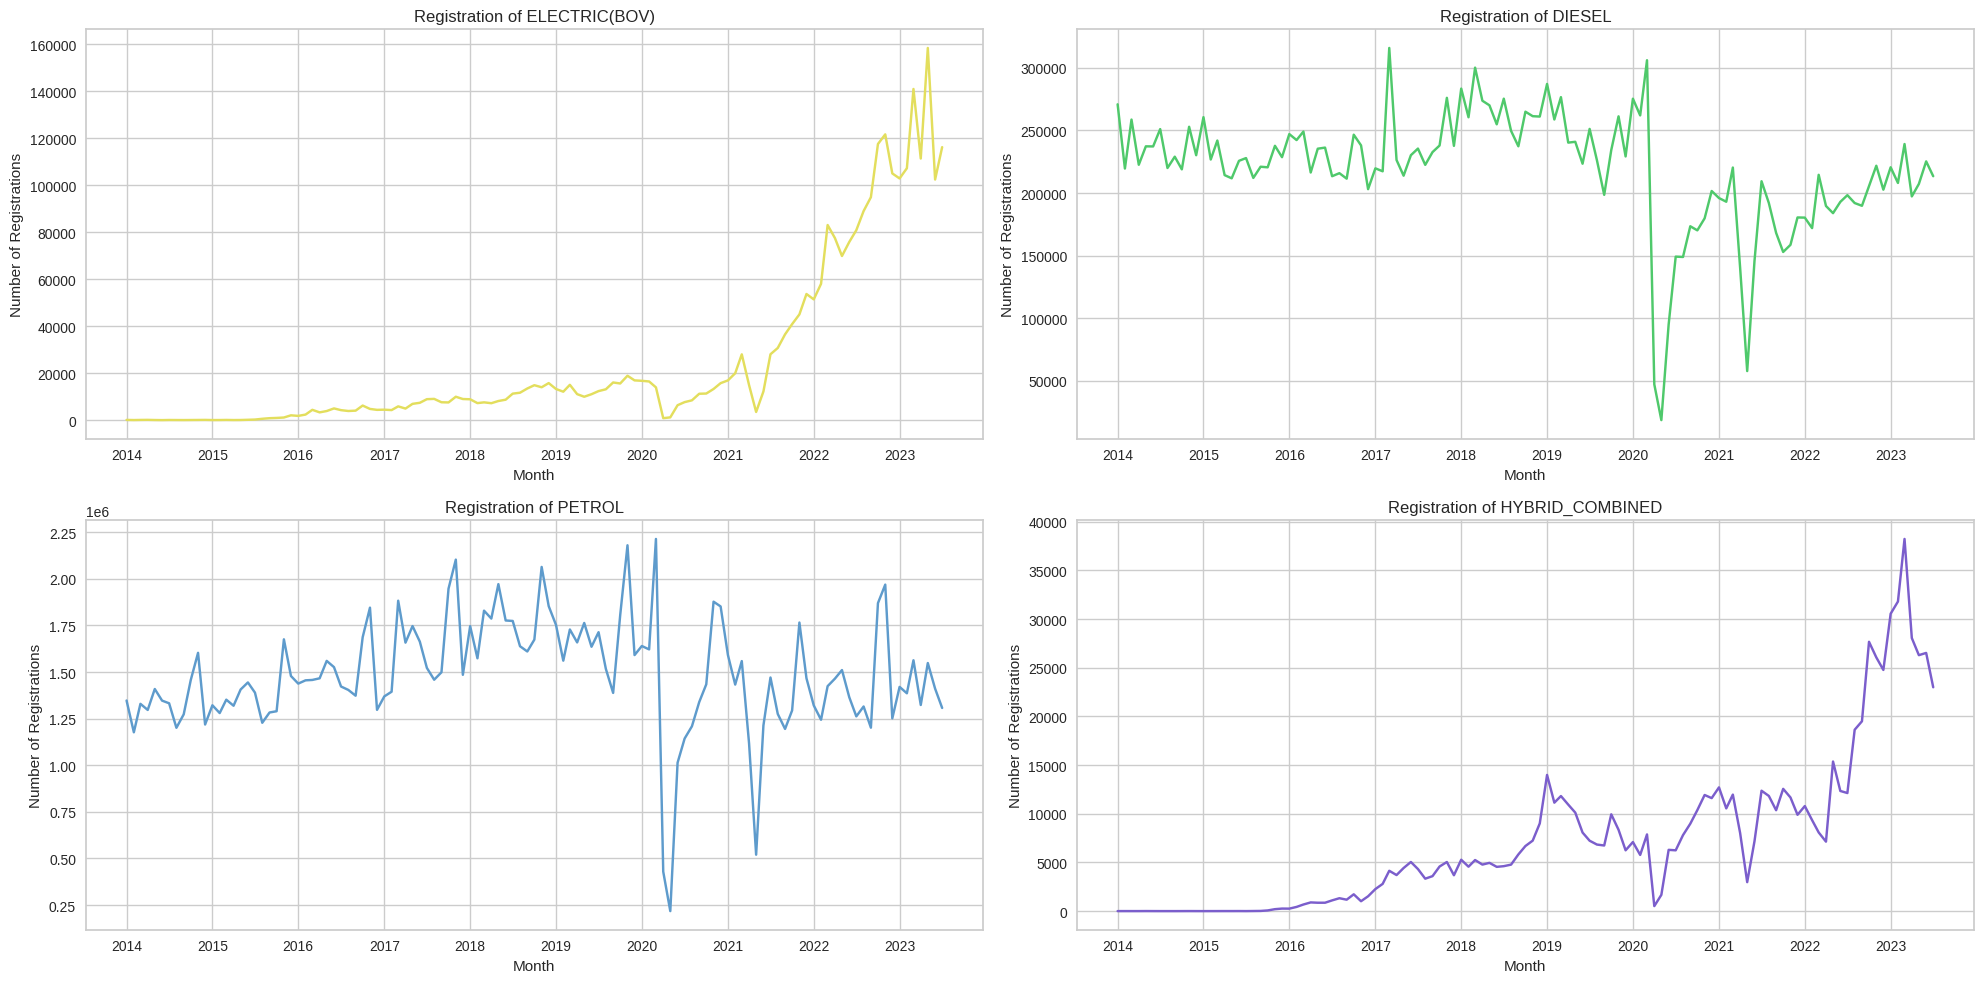

In [86]:
import matplotlib.pyplot as plt

# Define the fuel types and corresponding colors
fuel_types = ['ELECTRIC(BOV)', 'DIESEL', 'PETROL', 'HYBRID_COMBINED']
colors = ['#e3de5d', '#4fc96b', '#5e9bcc', '#7b5ecc']

# Define the number of rows and columns for subplots
n_rows = 2
n_cols = 2

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each fuel type on a separate subplot
for i, (fuel_type, color) in enumerate(zip(fuel_types, colors)):
    ax = axes[i]
    ax.plot(FuelType['Month'],FuelType[fuel_type], color=color)
    ax.set_title(f'Registration of {fuel_type}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Registrations')

# Hide the empty subplots if any
for i in range(len(fuel_types), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


The registrations of electric and hybrid vehicles, out of the four fuel type varieties, exhibit a discernible increasing trend throughout the course of time and appear to indicate a developing market in the near future.


In [87]:
finalColumns = ['Month', 'DIESEL', 'HYBRID_COMBINED','ELECTRIC(BOV)','PETROL']
finalFuelType = FuelType.loc[:,finalColumns]
finalFuelType

Month  DIESEL  HYBRID_COMBINED  ELECTRIC(BOV)   PETROL
0   2014-01-01  270915                3            232  1347016
1   2014-02-01  219601                4            171  1176669
2   2014-03-01  258723                3            220  1329273
3   2014-04-01  222632                3            252  1296500
4   2014-05-01  237336                7            186  1408836
..         ...     ...              ...            ...      ...
110 2023-03-01  239185            38240         140895  1562953
111 2023-04-01  197337            28058         111327  1323102
112 2023-05-01  207305            26299         158336  1548095
113 2023-06-01  225327            26529         102409  1410875
114 2023-07-01  213472            23000         116172  1307183

[115 rows x 5 columns]

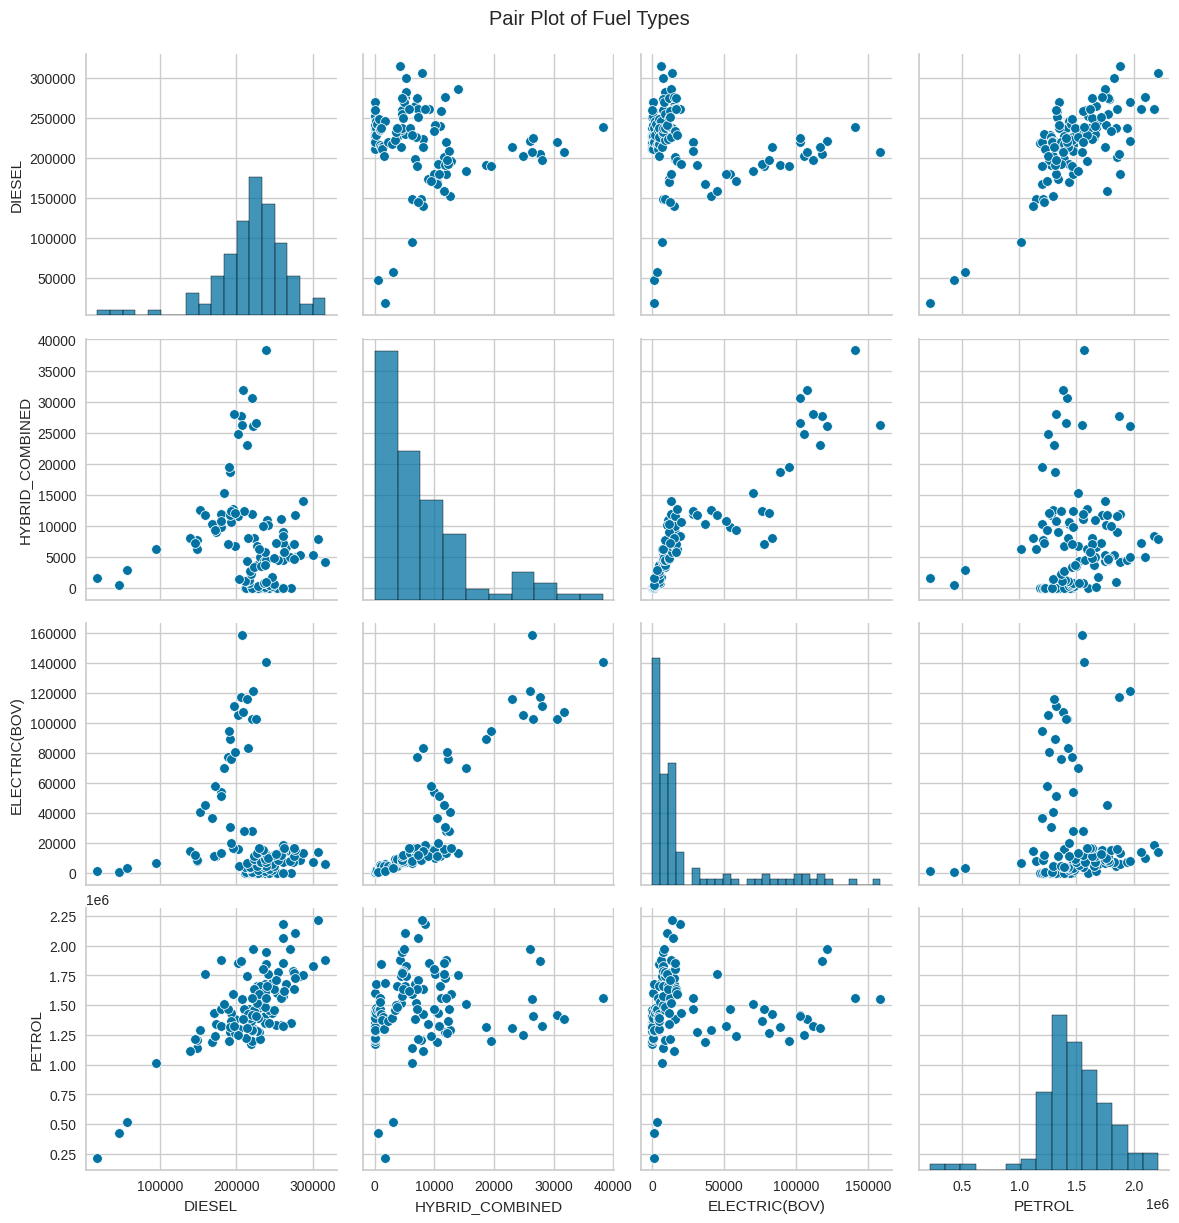

In [88]:
pairplot = sns.pairplot(finalFuelType, height=3)
pairplot.fig.suptitle('Pair Plot of Fuel Types', y=1.02)
plt.show()


**Correlation Matrix**

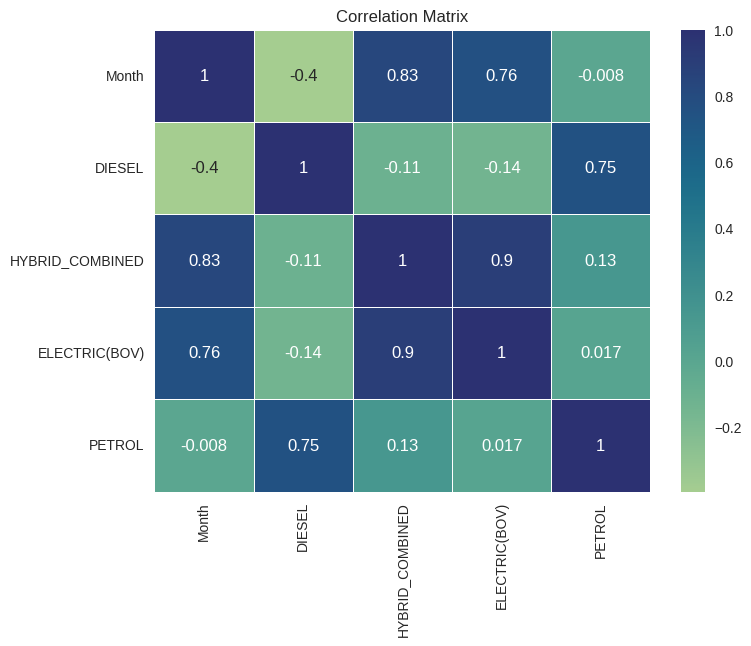

In [89]:
correlation_matrix = finalFuelType.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



*   Strong positive correlation exists between "DIESEL" and "PETROL" (0.87), suggesting that these fuel types tend to move together in terms of their values.
* "HYBRID COMBINED" and "PETROL" have a somewhat positive correlation (0.54), as does "HYBRID COMBINED" and "ELECTRIC(BOV)" (0.44), suggesting a certain level of co-occurrence.


*   A weak positive correlation exists between "Year" and "ELECTRIC(BOV)" (0.23), suggesting a possible increase in electric vehicles over time.
*   "ELECTRIC(BOV)" and "DIESEL" have a high negative connection (-0.84), meaning that a rise in electric cars is linked to a fall in the use of diesel.





In [90]:
finalFuelType['Year'] = finalFuelType['Month'].dt.year

selectedYears = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
filteredDatasetFuelType = finalFuelType[finalFuelType['Year'].isin(selectedYears)]
totalRegistrationsPerYear = filteredDatasetFuelType.groupby('Year')[['DIESEL', 'HYBRID_COMBINED', 'ELECTRIC(BOV)', 'PETROL']].sum()

# Calculating percentages for each fuel type
fuelTypePercentages = totalRegistrationsPerYear.divide(totalRegistrationsPerYear.sum(axis=1), axis=0) * 100

**Plotting an Pie chart**

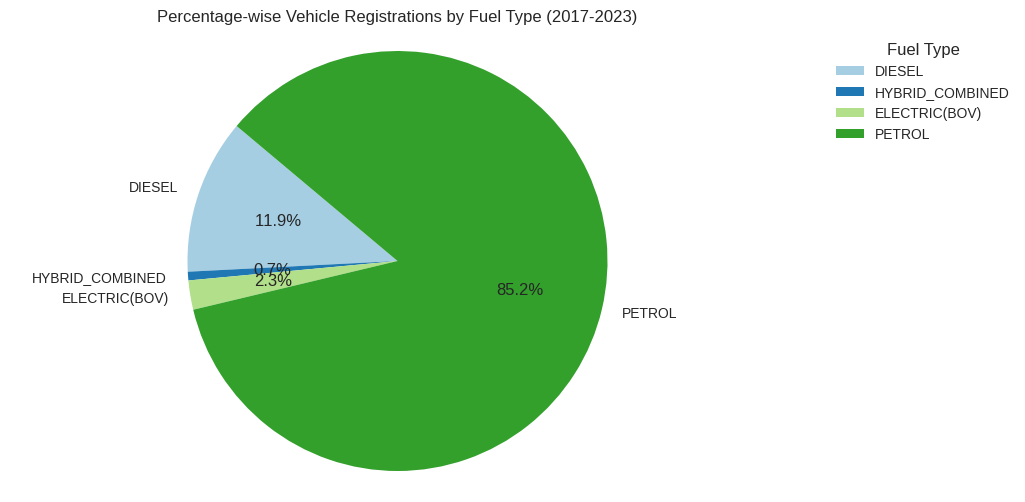

In [91]:
import matplotlib.pyplot as plt

# Calculate total percentage for each fuel type
total_percentage = fuelTypePercentages.sum(axis=0)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_percentage, labels=total_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(total_percentage))))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2017-2023)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [92]:
numericalColumns = finalFuelType.select_dtypes(include=['int64', 'float64']).columns
datetimeColumns = finalFuelType['Month']
numericalData = finalFuelType[numericalColumns]

**Performing PCA**

In [93]:
scaler = StandardScaler()
numericalScaledData = scaler.fit_transform(numericalData)
scaledData = pd.DataFrame(numericalScaledData, columns=numericalColumns)


In [94]:
pca = PCA(random_state = 42)
pca.fit(scaledData)

PCA(random_state=42)

In [95]:
dataPCA = pca.transform(scaledData)


In [96]:
dfPCA = pd.DataFrame(dataPCA, columns = [f'PC{x +1}' for x in range(len(scaledData.columns))])

In [97]:
dfPCA.head()

PC1     PC2     PC3     PC4
0 -1.3169 -0.1023 -0.9874 -0.0845
1 -0.9621  1.0253 -0.6049 -0.0328
2 -1.2406  0.1118 -0.8462 -0.0549
3 -1.0205  0.6986 -0.3852  0.0489
4 -1.1459  0.2254 -0.3535  0.0804

In [98]:
PCAsummary = pd.DataFrame({'Standard Deviation':dfPCA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

**Displaying PCA summary and components**

In [99]:
PCAsummary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1              1.3972                  0.4838                0.4838
PC2              1.3258                  0.4356                0.9194
PC3              0.4866                  0.0587                0.9781
PC4              0.2973                  0.0219                1.0000

In [100]:
factorLoadings = pd.DataFrame(pca.components_, columns = scaledData.columns, index = dfPCA.columns).T

In [101]:
factorLoadings

PC1     PC2     PC3     PC4
DIESEL          -0.2675 -0.6554 -0.6869 -0.1648
HYBRID_COMBINED  0.6711 -0.2177  0.1143 -0.6994
ELECTRIC(BOV)    0.6833 -0.1521 -0.2788  0.6574
PETROL          -0.1057 -0.7071  0.6614  0.2268

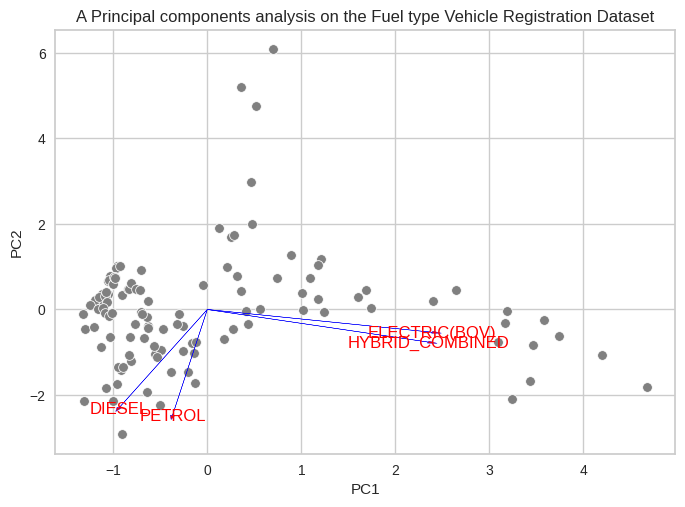

In [102]:
indexNames = factorLoadings.index

sns.scatterplot(dfPCA, x = 'PC1', y = 'PC2', color = 'grey')

for i in range(len(factorLoadings['PC1'])):
    plt.arrow(0, 0, factorLoadings['PC1'][i] * 3.5, factorLoadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='blue')
    plt.text((factorLoadings['PC1'][i] * 3.5), factorLoadings['PC2'][i]* 3.5, indexNames[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis on the Fuel type Vehicle Registration Dataset')
plt.grid(True)
plt.show()


**Extracting Segments**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

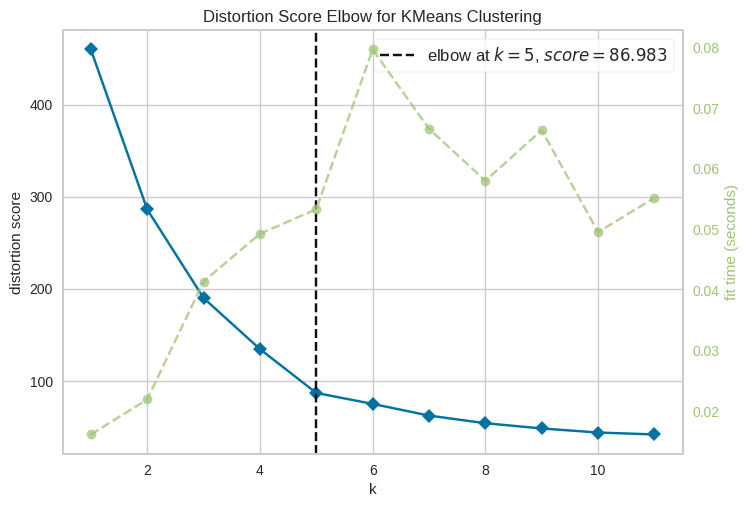

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Instantiate KMeans model
model = KMeans()

# Instantiate and fit the visualizer with distortion as the metric
visualizer = KElbowVisualizer(model, k=(1, 12), metric='distortion')
visualizer.fit(scaledData)

# Display the elbow plot
visualizer.show()


In [104]:
kmeans = KMeans(n_clusters=5)
finalFuelType['Cluster'] = kmeans.fit_predict(scaledData)

# Visualize or analyze the clusters
print(finalFuelType['Cluster'].value_counts())

Cluster
3    41
0    35
4    23
1    12
2     4
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



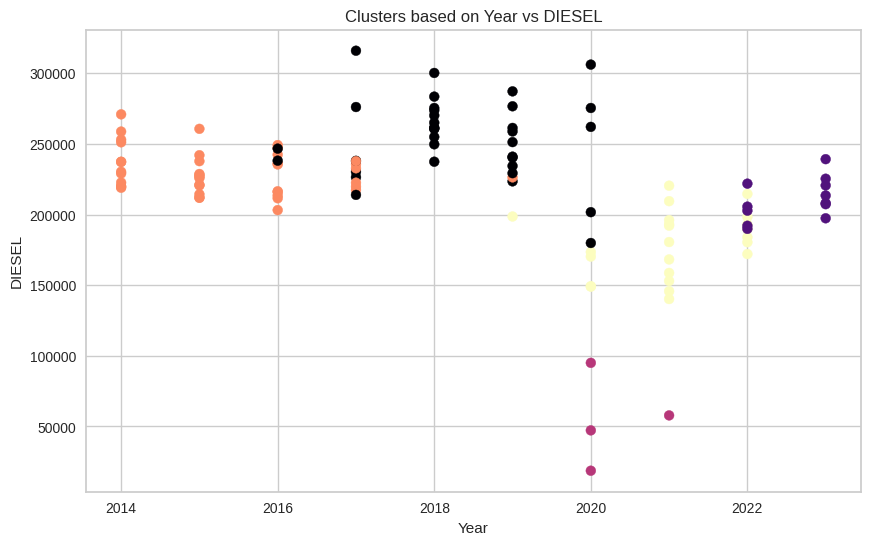

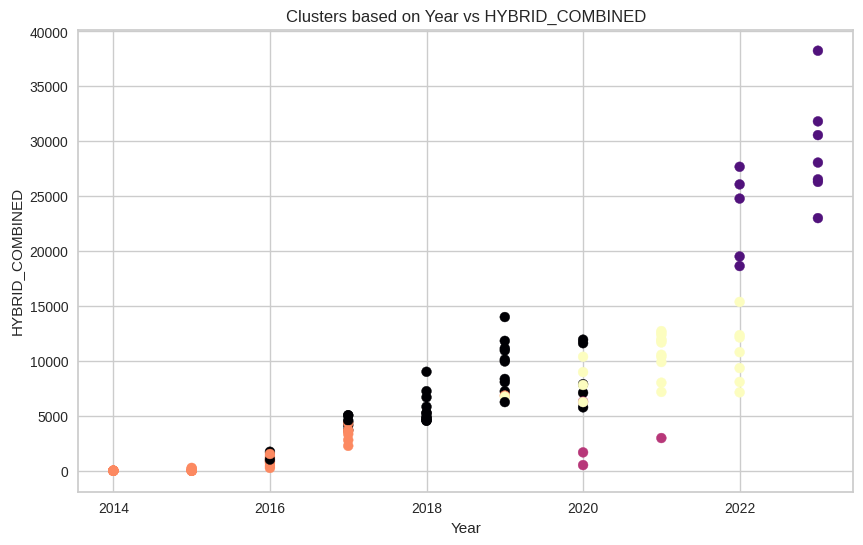

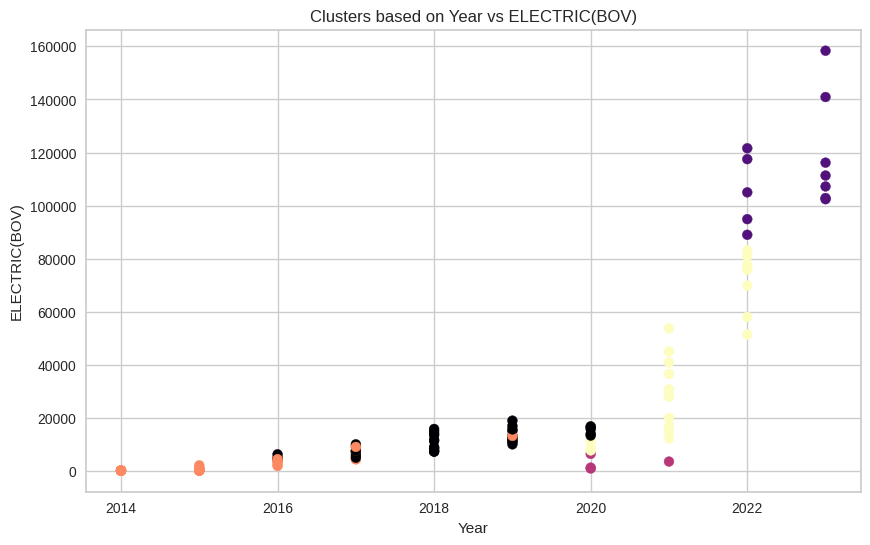

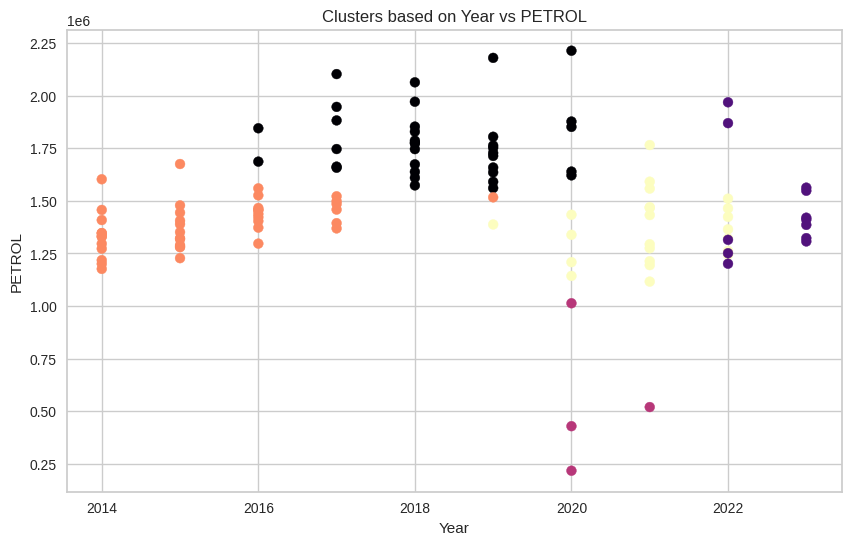

In [105]:
for feature in finalColumns[1:]:
    plt.figure(figsize=(10, 6))
    plt.scatter(x='Year', y=feature, data=finalFuelType, c=finalFuelType['Cluster'], cmap='magma', s=50)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Clusters based on Year vs {feature}')
    plt.show()

In [106]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(scaledData)
finalFuelType['Cluster Number'] = kmeans.labels_
# Label assigned for each data point
print (kmeans.labels_)

# Gives within-cluster sum of squares.
print (kmeans.inertia_)

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.n_iter_)

# Location of the centroids on each cluster.
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0
 0 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 4 3 3 3 3 3
 3 2 2 2 4 4 4 4 4 3 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1
 1 1 1 1]
87.08363003683317
5
[[ 0.23626 -0.8041  -0.59883 -0.30817]
 [-0.19442  2.42645  2.50937 -0.07033]
 [-3.5459  -0.55777 -0.58472 -3.14464]
 [ 0.80501 -0.07999 -0.35448  0.99025]
 [-0.85584  0.36673  0.36795 -0.31712]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [107]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 41, 3: 34, 4: 24, 2: 4, 1: 12})

In [108]:
kmeans.cluster_centers_[:,1]

array([-0.8041 ,  2.42645, -0.55777, -0.07999,  0.36673])

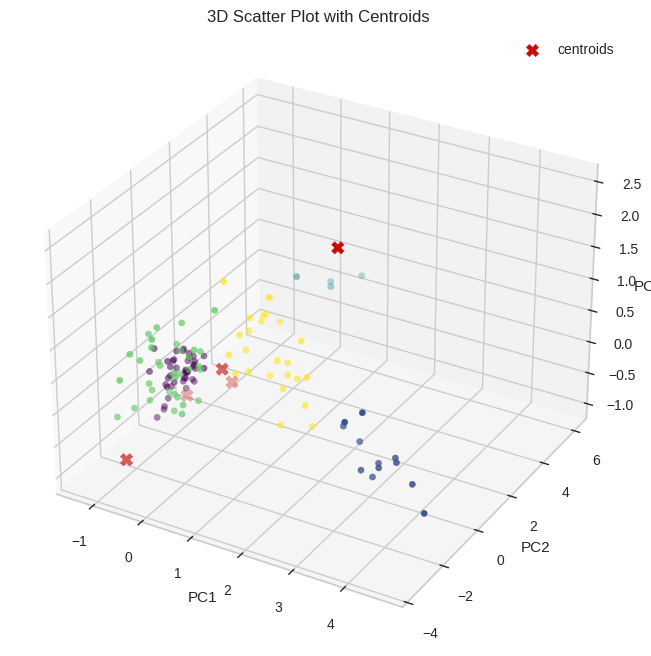

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and axes for the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter plot
scatter = ax.scatter(xs=dfPCA['PC1'], ys=dfPCA['PC2'], zs=dfPCA['PC3'], c=kmeans.labels_, cmap='viridis')

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
           marker="X", c="r", s=80, label="centroids")

# Add legend
plt.legend()

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot with Centroids')

# Show the plot
plt.show()


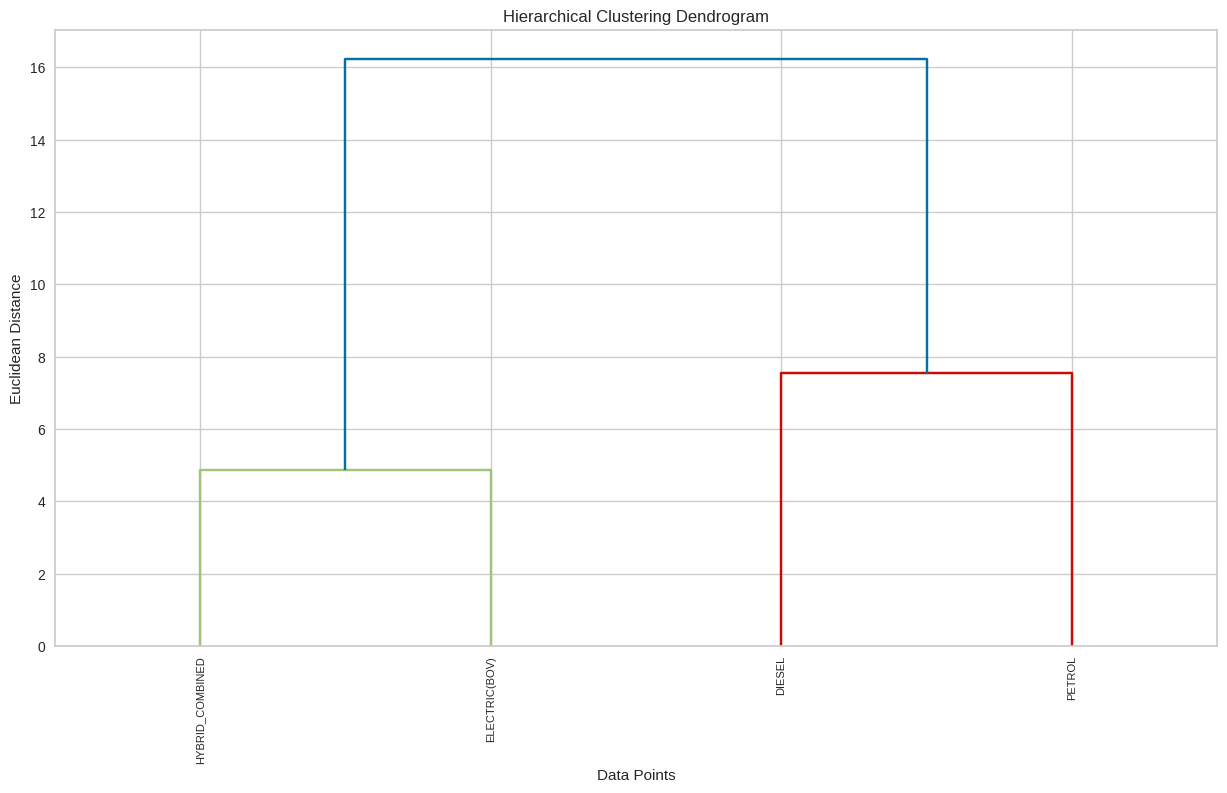

In [110]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = scaledData.transpose()

# Perform hierarchical clustering
MD_vclust = linkage(transposed_data, method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 8))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Describing Segments**

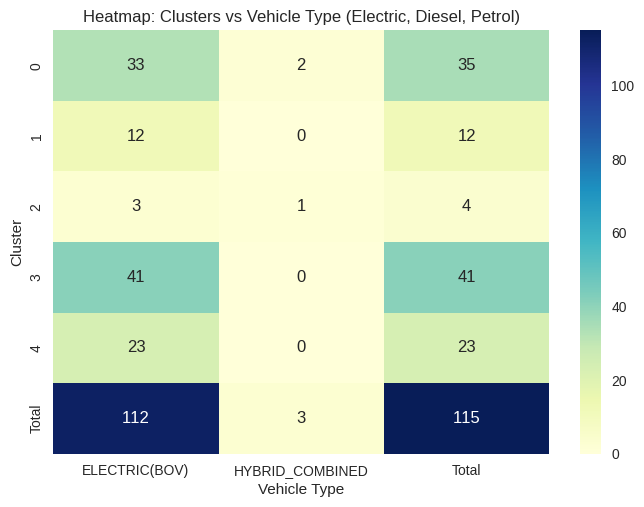

In [111]:
# Replace '/' with '_' in 'Vehicle Type' column
finalColumns = ['Month', 'DIESEL', 'HYBRID_COMBINED', 'ELECTRIC(BOV)', 'PETROL', 'Year', 'Cluster', 'Cluster Number']
selectedFeatures = finalFuelType[finalColumns]
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'HYBRID_COMBINED']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()


Based on the above heatmap, here are some observations:

*   Cluster 0: Compared to diesel and gasoline vehicles, the number of electric vehicles is substantially higher in this cluster.
*   Cluster 1: The distribution of vehicle types is more balanced in this cluster; the biggest number of cars are petrol, followed by electric and diesel vehicles.


*   Cluster 2: This cluster is primarily composed of Diesel vehicles, with a very low count of Electric and Petrol vehicles.
*   Cluster 3: The number of electric vehicles in this cluster is moderate, and they are followed by diesel and gasoline vehicles.






**Selecting (the) Target Segment(s)**

In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define a function to encode the values using LabelEncoder
encoder = LabelEncoder()
finalFuelType['ELECTRIC(BOV)'] = finalFuelType['ELECTRIC(BOV)'].map(lambda x: encoder.fit_transform([x])[0])

# Calculate the mean of 'ELECTRIC(BOV)' for each cluster
electricBOV = finalFuelType.groupby('Cluster Number')['ELECTRIC(BOV)'].mean().reset_index()

electricBOV


Cluster Number  ELECTRIC(BOV)
0               0         0.0000
1               1         0.0000
2               2         0.0000
3               3         0.0000
4               4         0.0000

In [113]:
import pandas as pd

# Use LabelEncoder to transform 'HYBRID COMBINED'
finalFuelType['HYBRID_COMBINED'] = LabelEncoder().fit_transform(finalFuelType['HYBRID_COMBINED'])

# Calculate the mean of 'HYBRID COMBINED' for each cluster
petrol_Hybrid = finalFuelType.groupby('Cluster Number')['HYBRID_COMBINED'].apply(lambda x: x.mean()).reset_index()

petrol_Hybrid


Cluster Number  HYBRID_COMBINED
0               0          12.3171
1               1          96.5000
2               2          29.2500
3               3          51.7941
4               4          72.6250

In [114]:
from sklearn.preprocessing import LabelEncoder
finalFuelType['HYBRID_COMBINED']= LabelEncoder().fit_transform(finalFuelType['HYBRID_COMBINED'])
hybridCombined= finalFuelType.groupby('Cluster Number')['HYBRID_COMBINED'].mean()
hybridCombined= hybridCombined.to_frame().reset_index()
hybridCombined

Cluster Number  HYBRID_COMBINED
0               0          12.3171
1               1          96.5000
2               2          29.2500
3               3          51.7941
4               4          72.6250

In [115]:
segment = electricBOV.merge(hybridCombined, on = 'Cluster Number', how = 'left')
segment

Cluster Number  ELECTRIC(BOV)  HYBRID_COMBINED
0               0         0.0000          12.3171
1               1         0.0000          96.5000
2               2         0.0000          29.2500
3               3         0.0000          51.7941
4               4         0.0000          72.6250

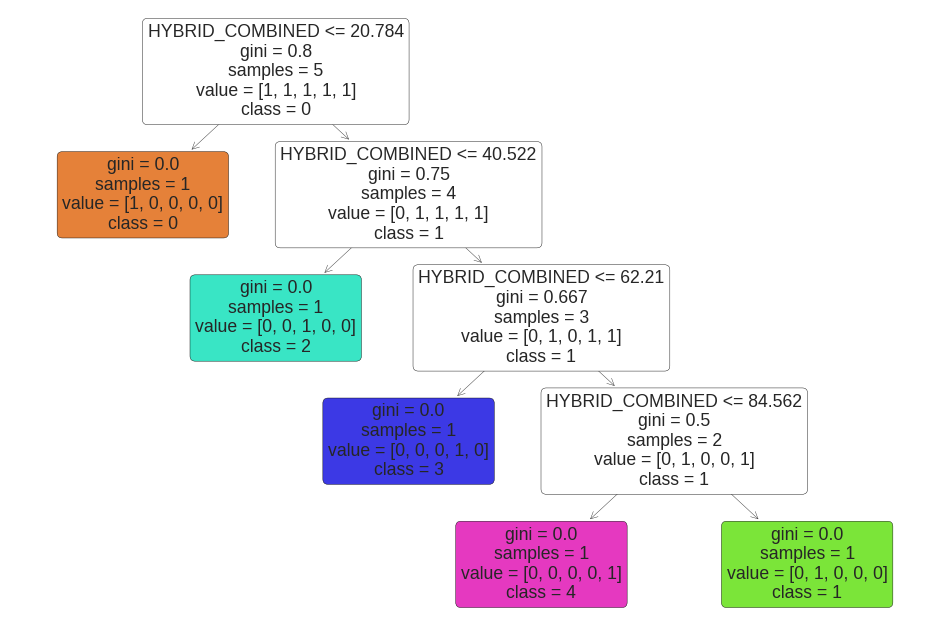

In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer


features = ['ELECTRIC(BOV)', 'HYBRID_COMBINED']
target = 'Cluster Number'

X = segment[features]
y = segment[target]

# Creating a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.show()